# **Trabalho Prático 03 - Classificação**
### **Professor:** Wagner Meira Jr. (Mineração de Dados)
### **Aluno:** Bernardo Reis de Almeida (2021032234)
### **Tema:** Identificação de Maliciosidade em Tráfegos de Rede
### **Base de Dados:** https://www.kaggle.com/datasets/agungpambudi/network-malware-detection-connection-analysis

**Obs.: Nenhuma ferramenta automatizada foi utilizada para a elaboração deste trabalho prático.**

## **Introdução**

O uso de tecnologias está se tornando cada vez mais universal na contemporaneidade. Artefatos tecnológicos estão se infiltrando de maneira ubíqua no cotidiano humano, participando de atividades corriqueiras, muitas vezes de maneira despercebida. A título de exemplo, tem-se controladores de temperatura em geladeiras, sistemas embarcados em carros, relógios digitais e, de maneira mais direta, smartphones, notebooks e desktops, todos elementos fundamentais nas vidas de muitos indivíduos e que estão inseridos nesse ecossistema interconectado da tecnologia e da informação.

Entretanto, do mesmo modo que a riqueza de aplicabilidades bem intencionadas é profunda, há margem para o usufruto desse conhecimento em direções questionáveis. Não é atípico notícias envolvendo grandes ataques em massa a sistemas de domínio público, potencialmente associados a questões políticas e/ou econômicas. Em um escopo menor, também, tem-se em mente a susceptibilidade de sistemas locais a ataques de indivíduos que desejam acesso a informações e/ou a recursos. Nessa era digital, é fundamental a construção de mecanismos que garantam a segurança dos usuários.

Sob esse contexto, o presente trabalho prático tem por objetivo a aplicação de técnicas da mineração de dados e, em particular, da construção de modelos de classificação, sobre o domínio de malware em redes. Uma base de dados contendo informações sobre tráfego de conexões e detecção de anomalias será utilizada para o treinamento de um modelo preditivo capaz de, dada uma nova conexão, predizer sua intencionalidade, maligna ou benigna. Nessa tarefa, tem-se em mente a produção de insights que colaborem com a segurança dos usuários, contribuindo para a construção de um ecossistema tecnológico mais saudável e interativo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay

sns.set_theme()

# Some libraries generate warnings in regard to deprecated compatibility issues that do not affect the results.
# There are also some UserWarnings in regard to graph plotting that are ignored for better output formatting.
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = UserWarning)

## **Metodologia**

Conforme o modelo CRISP-DM, em um primeiro momento, os objetivos da presente prática serão discutidos na seção [Entendimento do Projeto]. Em seguida, uma análise exploratória dos dados será abordada na seção [Entendimento dos Dados]. Após isso, a preparação efetiva da base para a tarefa será discorrida na seção [Preparação dos Dados]. A escolha e a implementação do modelo de mineração serão discutidos na seção [Modelagem]. Os resultados em si serão apresentados na seção [Apresentação e Validação dos Resultados]. Por fim, conclusões e reflexões sobre aplicações no domínio de interesse, assim como sobre o projeto como um todo, estarão na seção [Implantação e Conclusões].

## **Entendimento do Projeto**


O principal objetivo de negócio do presente trabalho prático consiste na obtenção de um sistema que consiga predizer a intenção por trás de conexões em uma rede, podendo atuar no cerne de uma plataforma de firewall ou de um antivírus, por exemplo. Em uma maior granularidade, deseja-se aprimorar as barreiras de segurança do negócio por meio da análise de dados coletados das interações entre seus sistemas, contribuindo para uma atividade tecnológica mais robusta e produtiva.

Em termos dos critérios de sucesso, uma infraestrutura de redes mais segura pode ser avaliada por diversas métricas internas aos sistemas de uma organização, como fluxo de rede, perda de pacotes, picos de utilização, dentre outros. Em termos mais específicos, entretanto, um mecanismo preditivo de sucesso é aquele que bloqueia conexões que, de fato, eram indesejadas, e, simultaneamente, permite aquelas de interesse, criando um ecossistema de comunicação eficiente e seguro.

Sob uma perspectiva técnica, o objetivo de negócio pode ser compreendido como a obtenção de um modelo de predição robusto capaz de, para uma nova entrada referente a uma conexão em rede, classificá-la corretamente quanto a sua intencionalidade, maligna ou benigna. Esse processo envolve a filtragem e a representação adequada dos dados, a escolha de um modelo preditivo compatível e o treinamento conforme as informações em posse.

O sucesso da tarefa de mineração de dados pode ser avaliado conforme diferentes métricas. Uma primeira, e talvez a mais direta, seria a taxa de acerto do modelo com relação ao conjunto de testes, mas outras grandezas mais elaboradas podem ser construídas a partir dos resultados. Também é interessante agregar à noção de “sucesso” uma análise estatística que garanta a significância dos conhecimentos obtidos. Finalmente, em uma perspectiva de longo prazo, o sucesso da tarefa também está relacionado à capacidade do modelo em predizer conexões de fato malignas, mas também em identificar conexões benignas, as quais podem ser de extremo interesse para a organização.

Em termos de ressalvas, deve-se considerar a necessidade pela escolha de um subconjunto de atributos referentes a um fluxo de rede que seja uma representação robusta desse objeto tendo em vista os objetivos da tarefa de mineração. Além disso, a escolha de um modelo de classificação adequado, compatível com as características do projeto, e o refinamento de seus parâmetros também são processos fundamentais para se alcançar o sucesso, tal como discutido. Por fim, enfatiza-se a relevância de uma análise estatística dos resultados para a confirmação da significância de diversas escolhas arbitrárias feitas ao longo do trabalho, como separação de conjuntos de treino e de teste.

Já em relação aos dados em si, um primeiro ponto a ser considerado diz respeito ao fato de que as informações foram coletadas em um ambiente específico e, portanto, são um subconjunto do universo de fluxos de rede, o que torna difícil uma generalização dos resultados encontrados. Além disso, a partir das informações preliminares sobre a base de dados, é possível observar que há ruídos, o que exigirá um tratamento adequado. Por fim, há também uma questão temporal sobre o modelo construído. Da mesma forma que as tecnologias evoluem e se adaptam, organismos maliciosos fazem o mesmo, de modo que, em um cenário prático, o modelo tenha que ser atualizado constantemente com novas informações em um ciclo iterativo de aprendizagem.

## **Entendimento dos Dados**

In [ ]:
url = 'https://drive.google.com/uc?id=1IbFZ0D100GaoNJKiTv6mnCkv24o_2h1p'
output = 'networktraffic.csv'
gdown.download(url, output, quiet=False)

networktraffic = pd.read_csv('networktraffic.csv', sep='|')

Downloading...
From: https://drive.google.com/uc?id=1IbFZ0D100GaoNJKiTv6mnCkv24o_2h1p
To: /content/networktraffic.csv
100%|██████████| 138M/138M [00:01<00:00, 116MB/s]


A base de dados escolhida é denominada “Malware Detection in Network Traffic Data” e está disponível publicamente na plataforma “Kaggle” sob o autor “Agung Pambudi”. Os dados originais, entretanto, foram coletados como parte de um estudo dos autores Sebastian Garcia, Agustin Parmisano e Maria Jose Erquiaga, intitulado “A labeled dataset with malicious and benign IoT network traffic”. No total, há 1.01 milhões de entradas, cada qual referente a uma instância de tráfego de rede representada por 23 diferentes atributos, dentre os quais se tem: um identificador único para a conexão, o IP da fonte, o IP do destino, a duração da conexão, o protocolo utilizado, o estado da conexão, dentre outros. De imediato, a partir da página da base de dados, é possível notar que há diversas entradas com valores faltantes para algumas colunas, aspecto que deverá ser tratado ao longo do trabalho. A classificação de cada entrada está contida na coluna “label”, a qual pode assumir dois valores: “Malicious”, indicando uma conexão maliciosa, e “Benign”, indicando uma conexão bem intencionada. Há descrições mais detalhadas sobre os fluxos identificados como prejudiciais, mas essas informações não serão utilizadas para fins da tarefa de mineração. Algumas características básicas sobre os dados são dispostas a seguir.

In [ ]:
networktraffic.shape

(1008748, 23)

In [ ]:
networktraffic.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.525880e+09,CUmrqr4svHuSXJy5z7,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,-,2.999051,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
1,1.525880e+09,CH98aB3s1kJeq6SFOc,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
2,1.525880e+09,C3GBTkINvXNjVGtN5,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
3,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,-,2.998796,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
4,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan


In [ ]:
networktraffic.describe()

,ts,id.orig_p,id.resp_p,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,1.008748e+06,1.008748e+06,1.008748e+06,1008748.0,1.008748e+06,1.008748e+06,1.008748e+06,1.008748e+06
mean,1.526075e+09,4.443684e+04,1.609771e+04,0.0,1.496242e+00,8.114562e+01,1.424647e-01,9.049184e+00
std,1.157431e+05,9.660592e+03,1.956280e+04,0.0,1.741176e+00,9.473090e+01,1.850414e+00,1.196776e+02
min,1.525880e+09,3.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.525975e+09,4.373000e+04,2.300000e+01,0.0,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00
50%,1.526071e+09,4.376300e+04,8.080000e+03,0.0,1.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00
75%,1.526174e+09,4.881400e+04,2.818025e+04,0.0,1.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00
max,1.526283e+09,6.539400e+04,6.553500e+04,0.0,6.000000e+01,2.990000e+03,7.500000e+01,9.415000e+03


In [ ]:
networktraffic.dtypes

ts                float64
uid                object
id.orig_h          object
id.orig_p         float64
id.resp_h          object
id.resp_p         float64
proto              object
service            object
duration           object
orig_bytes         object
resp_bytes         object
conn_state         object
local_orig         object
local_resp         object
missed_bytes      float64
history            object
orig_pkts         float64
orig_ip_bytes     float64
resp_pkts         float64
resp_ip_bytes     float64
tunnel_parents     object
label              object
detailed-label     object
dtype: object

As colunas da base de dados original podem ser divididas em alguns agrupamentos conforme a semântica que agregam. Em particular, estabelece-se 4 diferentes grupos: "identification_columns", o qual contém as colunas que armazenam informações que identificam cada uma das instâncias de tráfego em rede, "str_technical_columns" e "num_technical_columns", as quais contém dados técnicos sobre a conexão em si, no caso, em formato categórico e em formato numérico, respectivamente, e "label", atributo que simplesmente contém o rótulo real da respectiva instância. Como mencionado previamente, a coluna "detailed_label", a qual aprofunda a classificação das conexões "malignas", será descartada, de modo a manter o problema em um modelo binário.

Aqui, por mais que ainda não se esteja na fase de preparação dos dados, foi necessário um pequeno processamento do dataframe para uma correta visualização das informações. Em particular, as colunas com valores numéricos foram convertidas para o tipo "float64", enquanto as demais foram convertidas para o tipo "object". A razão para isso se deve ao fato de que, na base original, colunas com valores semanticamente numéricos, como "duration", estavam classificadas com o tipo "object", o que dificultava tarefas de visualização e de identificação de valores faltantes. Além disso, no modelo original, colunas do tipo "object" com valores faltantes apresentavam o caractere "-" na entrada relativa ao respectivo atributo, o que foi convertido para "NaN" tendo em vista a captura dessas anomalias.

In [ ]:
identification_columns = ['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p']
str_technical_columns = ['proto', 'service', 'conn_state', 'local_orig', 'local_resp', 'history', 'tunnel_parents']
num_technical_columns = ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes']
label_column = ['label']

# Converts numeric columns to numeric attribute in order to visualize data.
for column in num_technical_columns:
  networktraffic[column] = pd.to_numeric(networktraffic[column], errors = 'coerce')

# Converts other columns to object type, which is used for strings.
for column in [identification_columns + str_technical_columns + label_column]:
  networktraffic[column] = networktraffic[column].astype(object)

# Converts columns with "-" to "NaN"
networktraffic.replace(to_replace = '-', value = np.nan, inplace = True)

In [ ]:
networktraffic.isna().sum()

ts                      0
uid                     0
id.orig_h               0
id.orig_p               0
id.resp_h               0
id.resp_p               0
proto                   0
service           1005507
duration           796300
orig_bytes         796300
resp_bytes         796300
conn_state              0
local_orig        1008748
local_resp        1008748
missed_bytes            0
history             17421
orig_pkts               0
orig_ip_bytes           0
resp_pkts               0
resp_ip_bytes           0
tunnel_parents    1008748
label                   0
detailed-label     469275
dtype: int64

Em termos de dados faltantes, uma quantidade significativa de colunas apresenta uma quantidade significativa de lacunas. Inclusive, é possível ver que "local_orig", "local_resp" e "tunnel_parents" não possuem valores diferentes de "NaN" e, portanto, podem ser eliminadas da análise. O restante será tratado na etapa seguinte, após mais algumas decisões.

In [ ]:
networktraffic = networktraffic.drop(['local_orig', 'local_resp', 'tunnel_parents'], axis = 1)
str_technical_columns = ['proto', 'service', 'conn_state', 'history']

Dando um passo mais fundo, serão criadas visualizações das distribuições dos valores respectivos a cada uma das colunas. Esse estudo irá separar as entradas entre aquelas com label "Malicious" e "Benign", de modo a permitir se ter uma ideia inicial das diferenças nas distribuições entre as duas classes. O objetivo é, de maneira visual, extrair algum conhecimento sobre a relevância de cada atributo para a classificação, isto é, aqueles que possuem maior potencial de discernimento entre as categorias e, portanto, apresentam distribuições mais distantes.

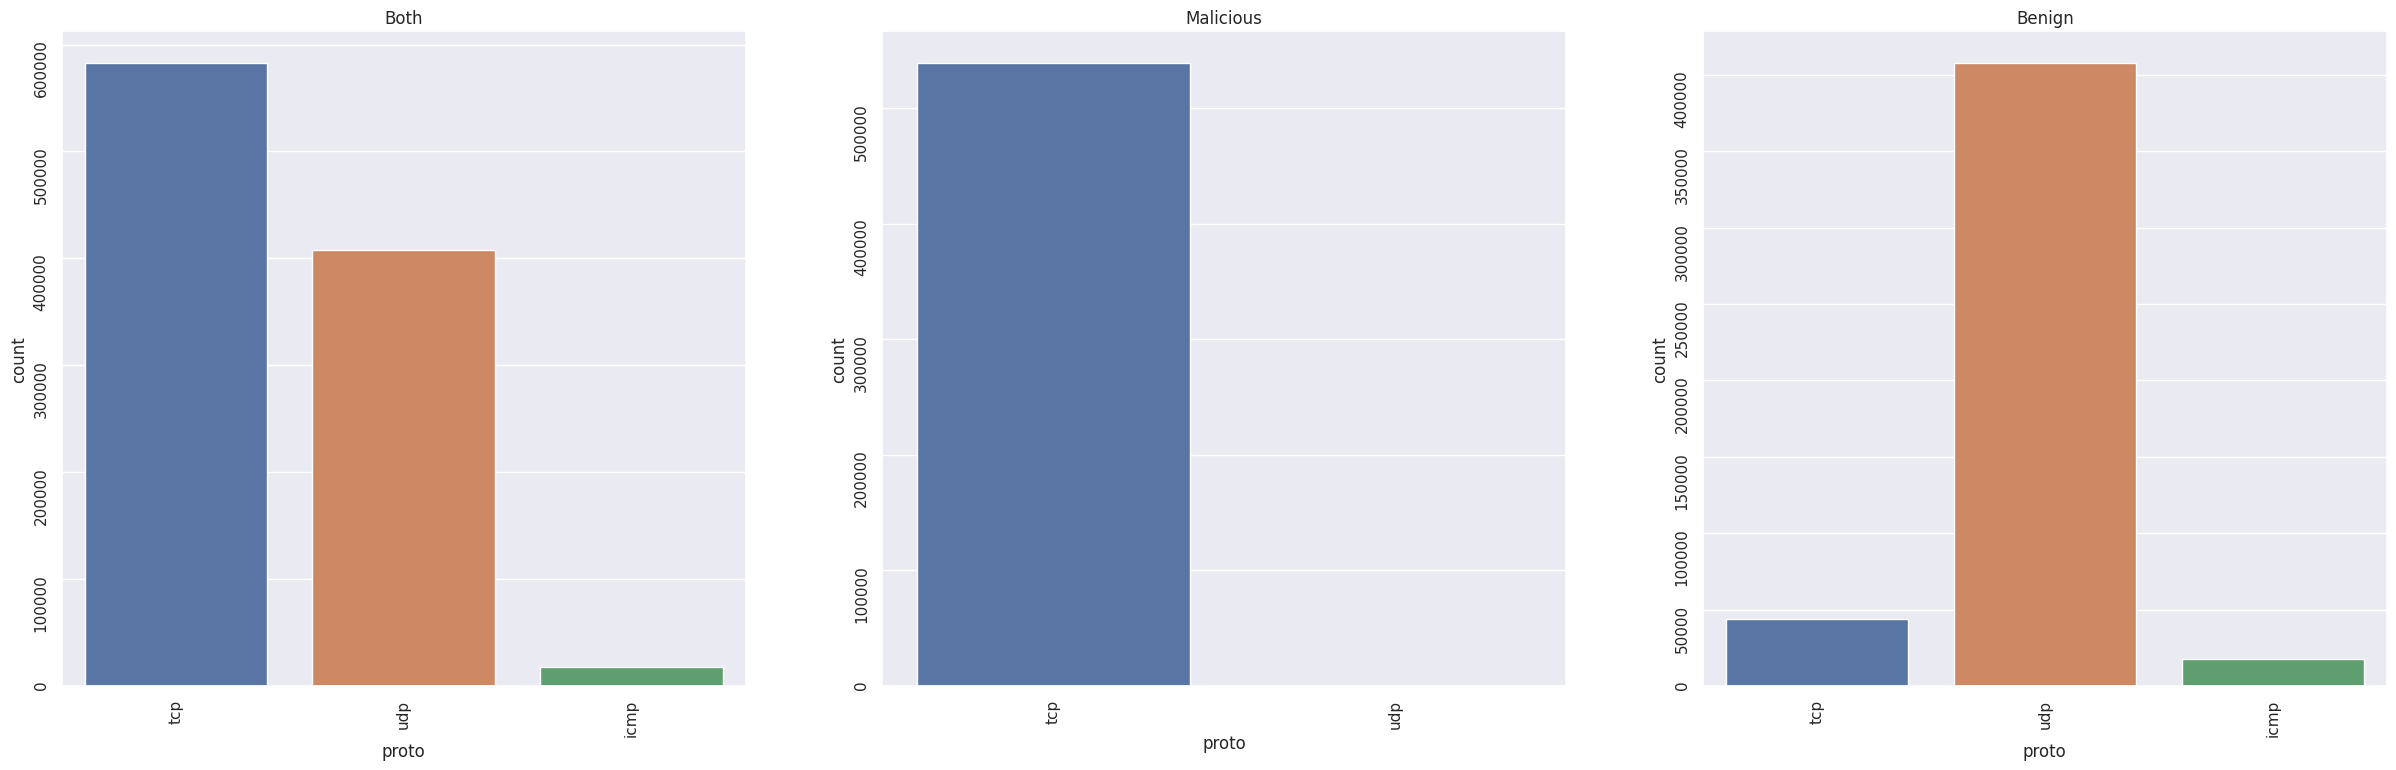

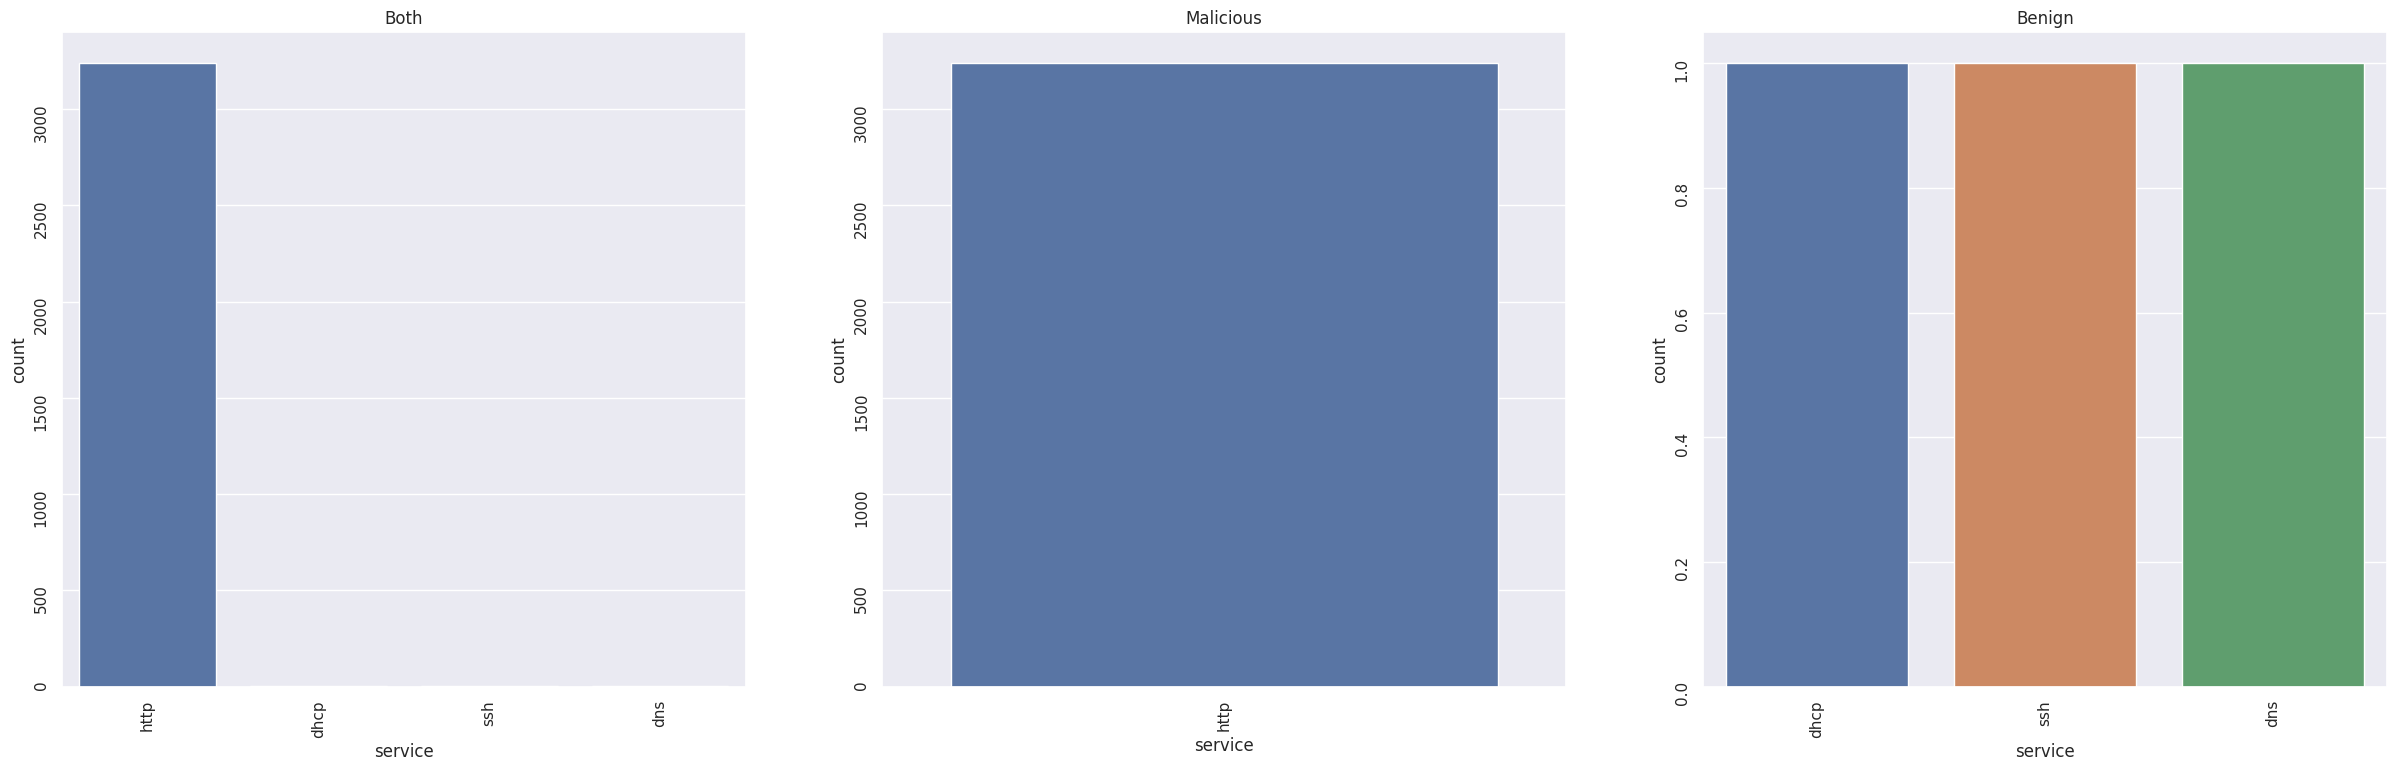

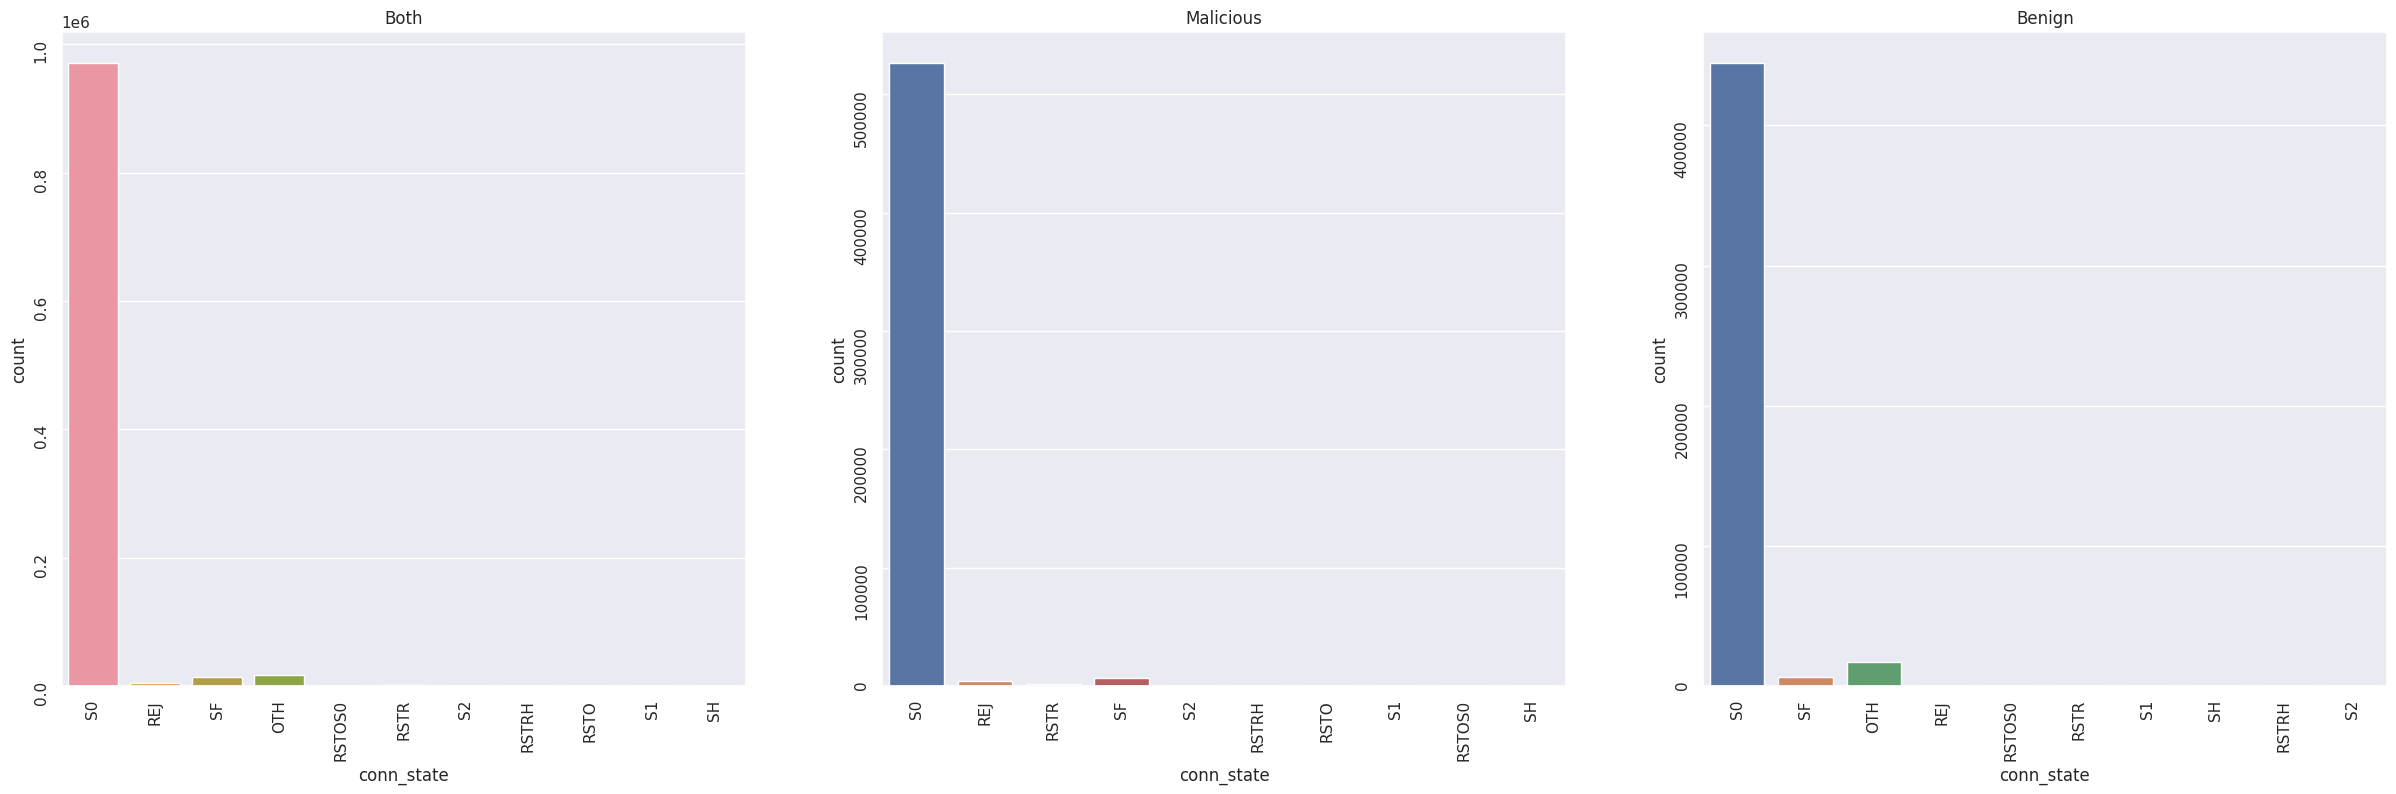

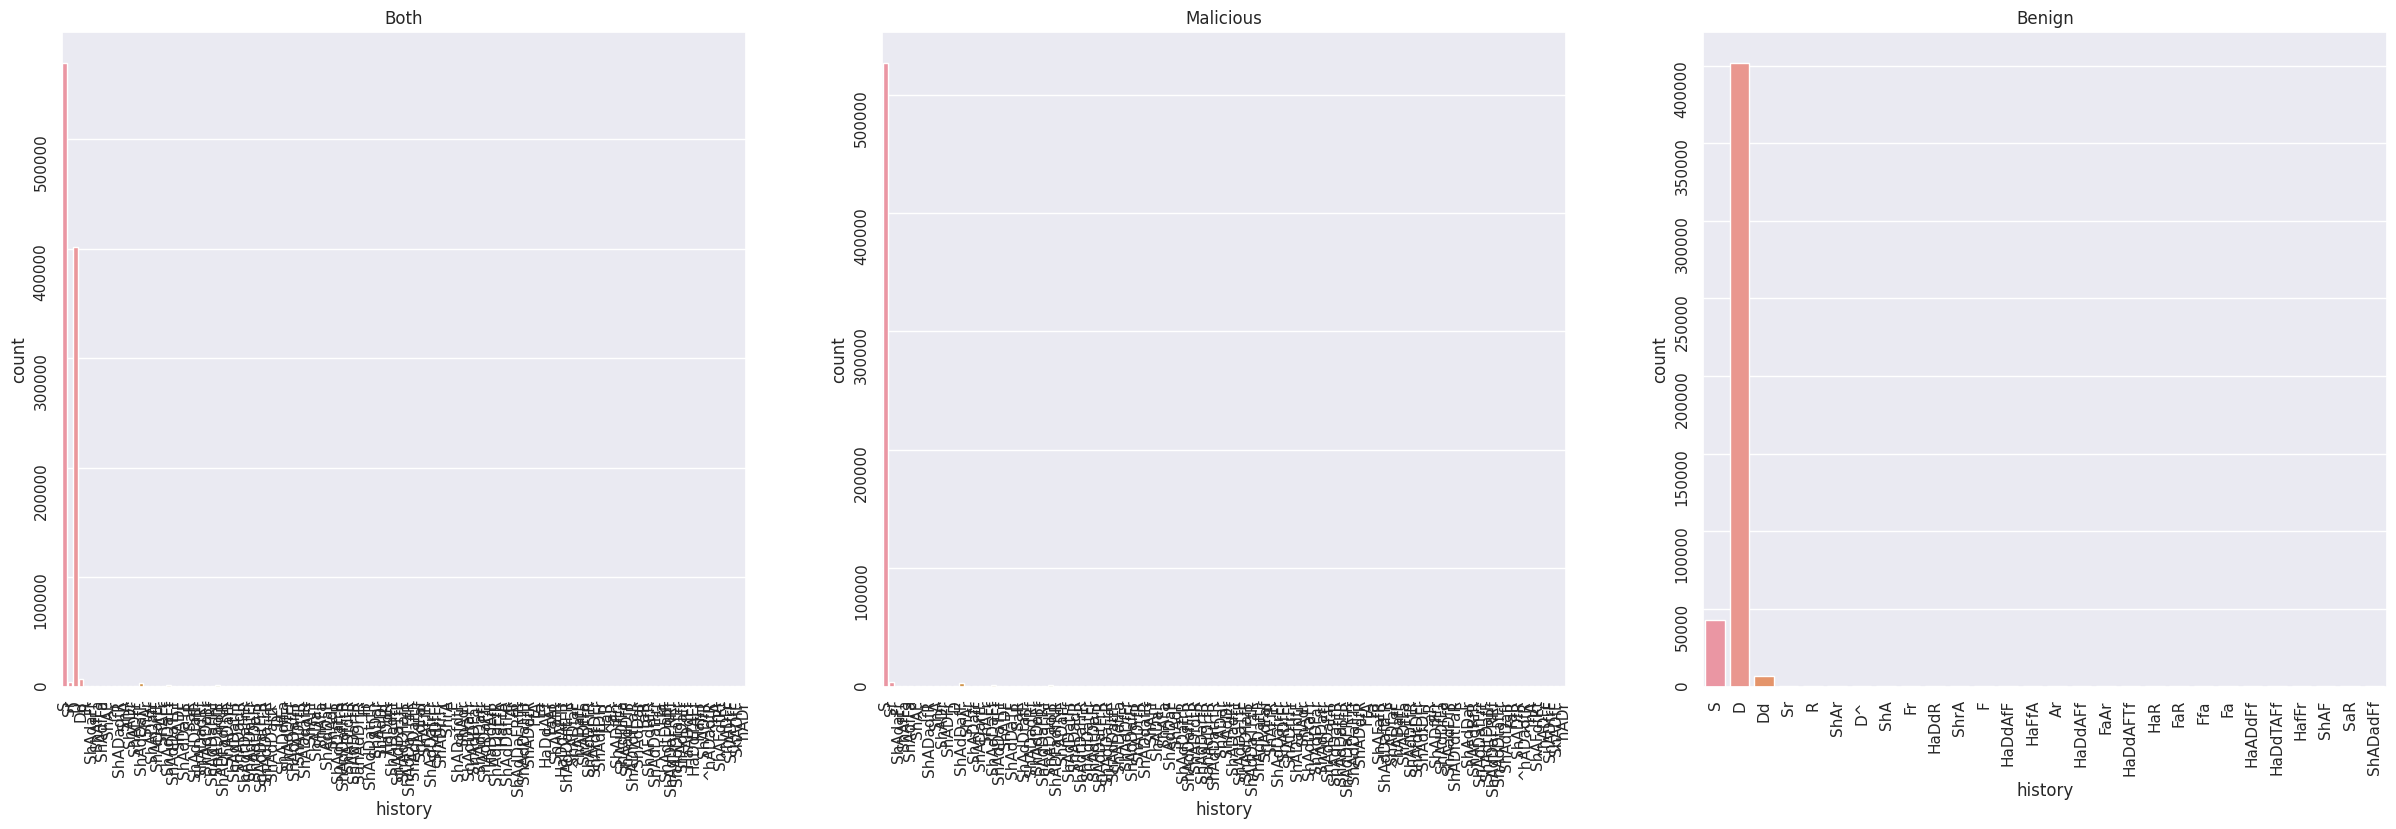

In [ ]:
for column in str_technical_columns:
  # Protects against columns with no not NaN value.
  if networktraffic[column].size == 0:
    continue
  fig, axs = plt.subplots(nrows = 1, ncols = 3)
  fig.set_size_inches(30, 8.5)
  sns.countplot(data = networktraffic, x = column, ax = axs[0])
  axs[0].tick_params(labelrotation = 90)
  axs[0].set_title('Both')
  sns.countplot(data = networktraffic[networktraffic['label'] == 'Malicious'], x = column, ax = axs[1])
  axs[1].tick_params(labelrotation = 90)
  axs[1].set_title('Malicious')
  sns.countplot(data = networktraffic[networktraffic['label'] == 'Benign'], x = column, ax = axs[2])
  axs[2].tick_params(labelrotation = 90)
  axs[2].set_title('Benign')
  plt.show()
  plt.close()

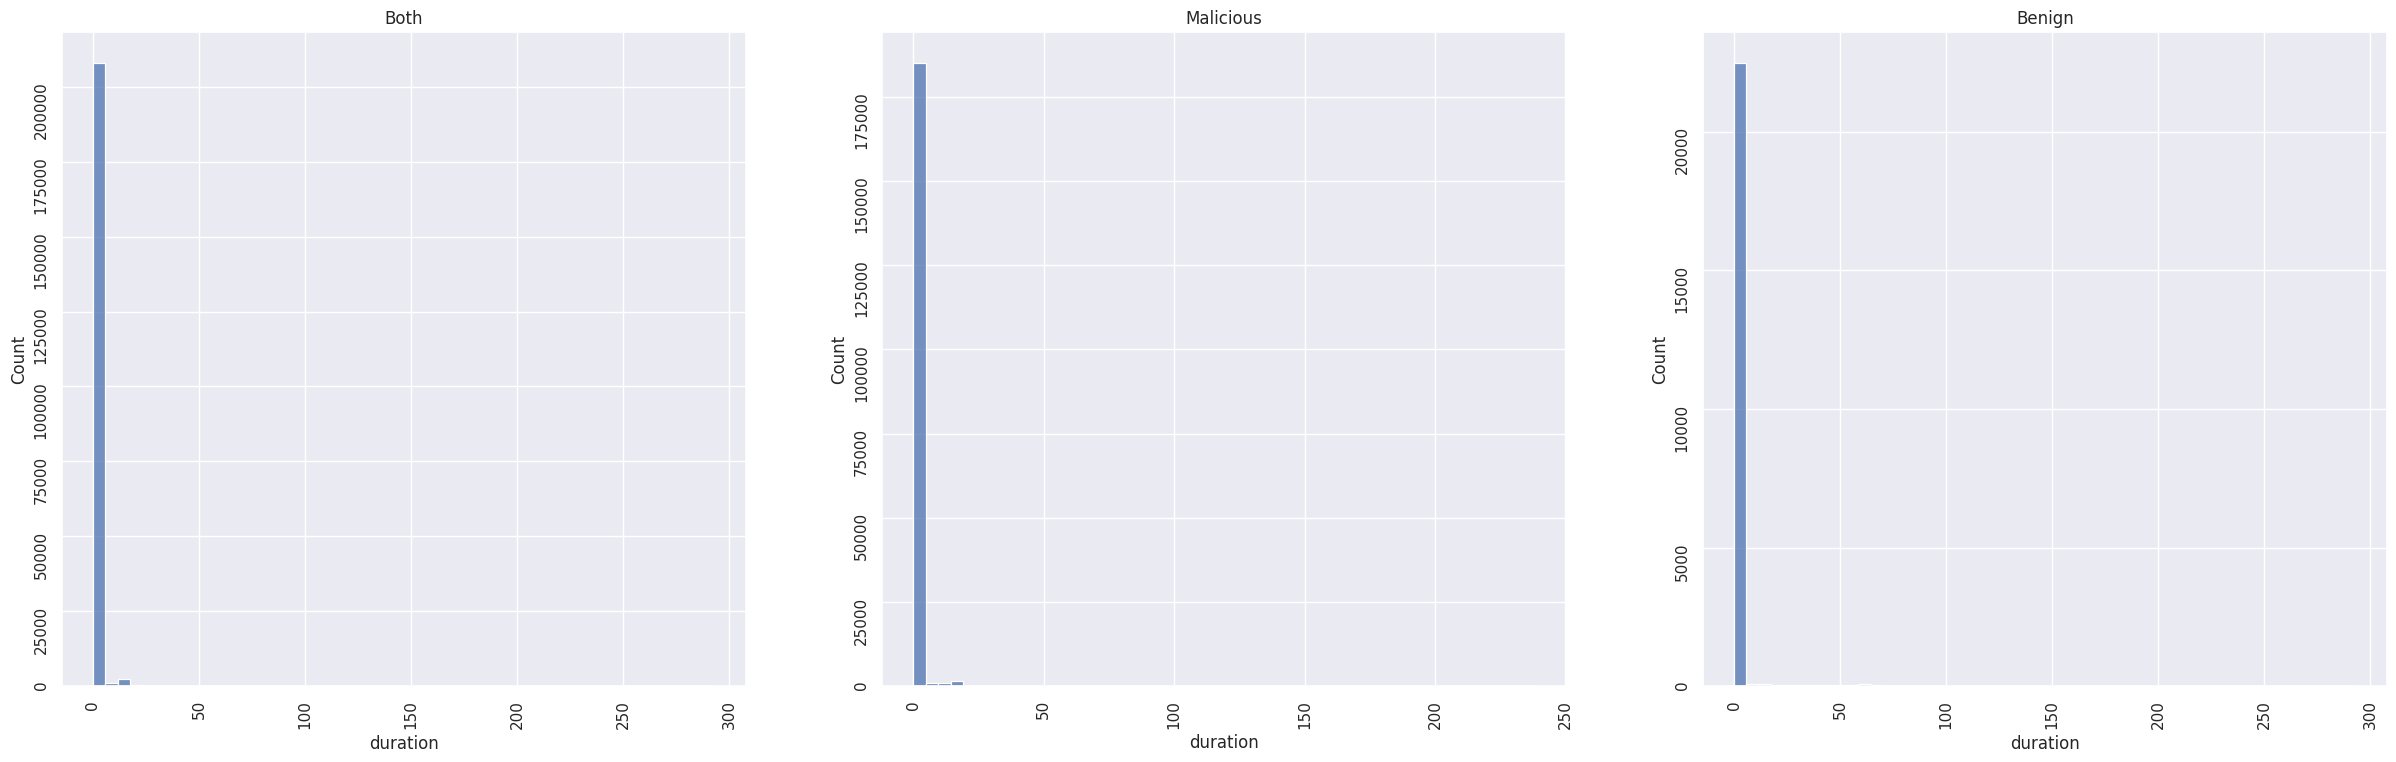

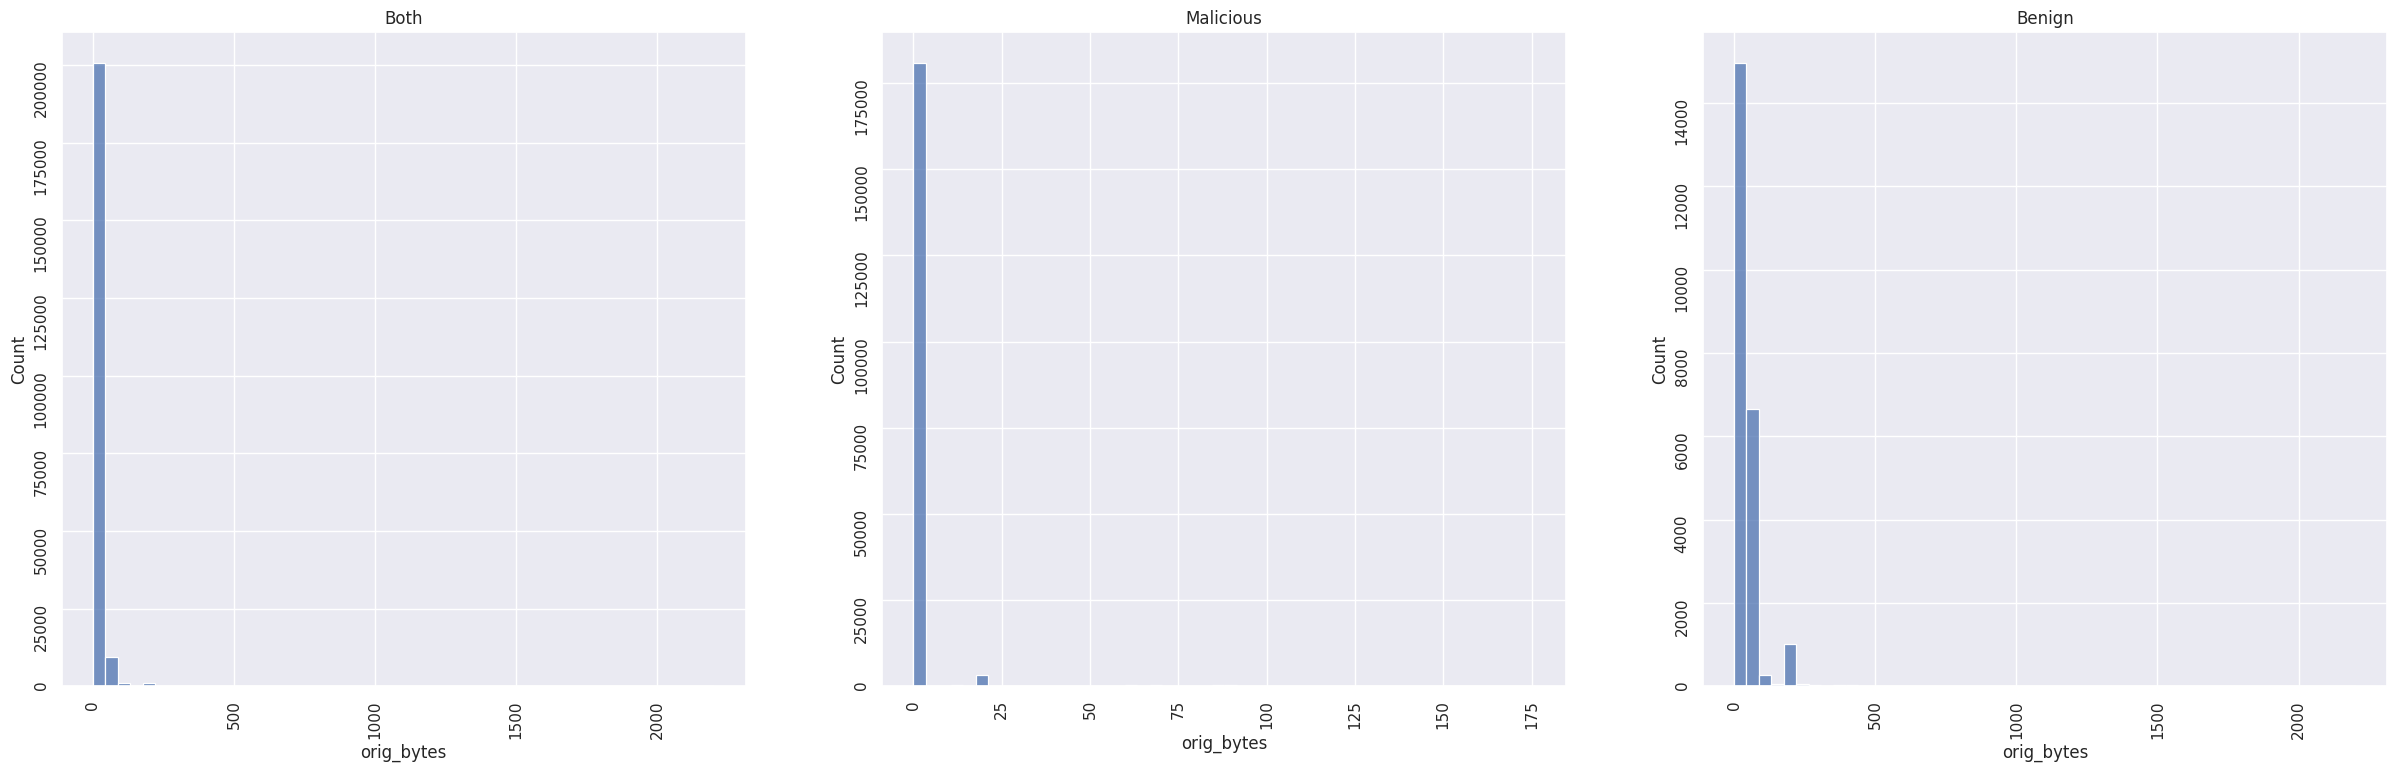

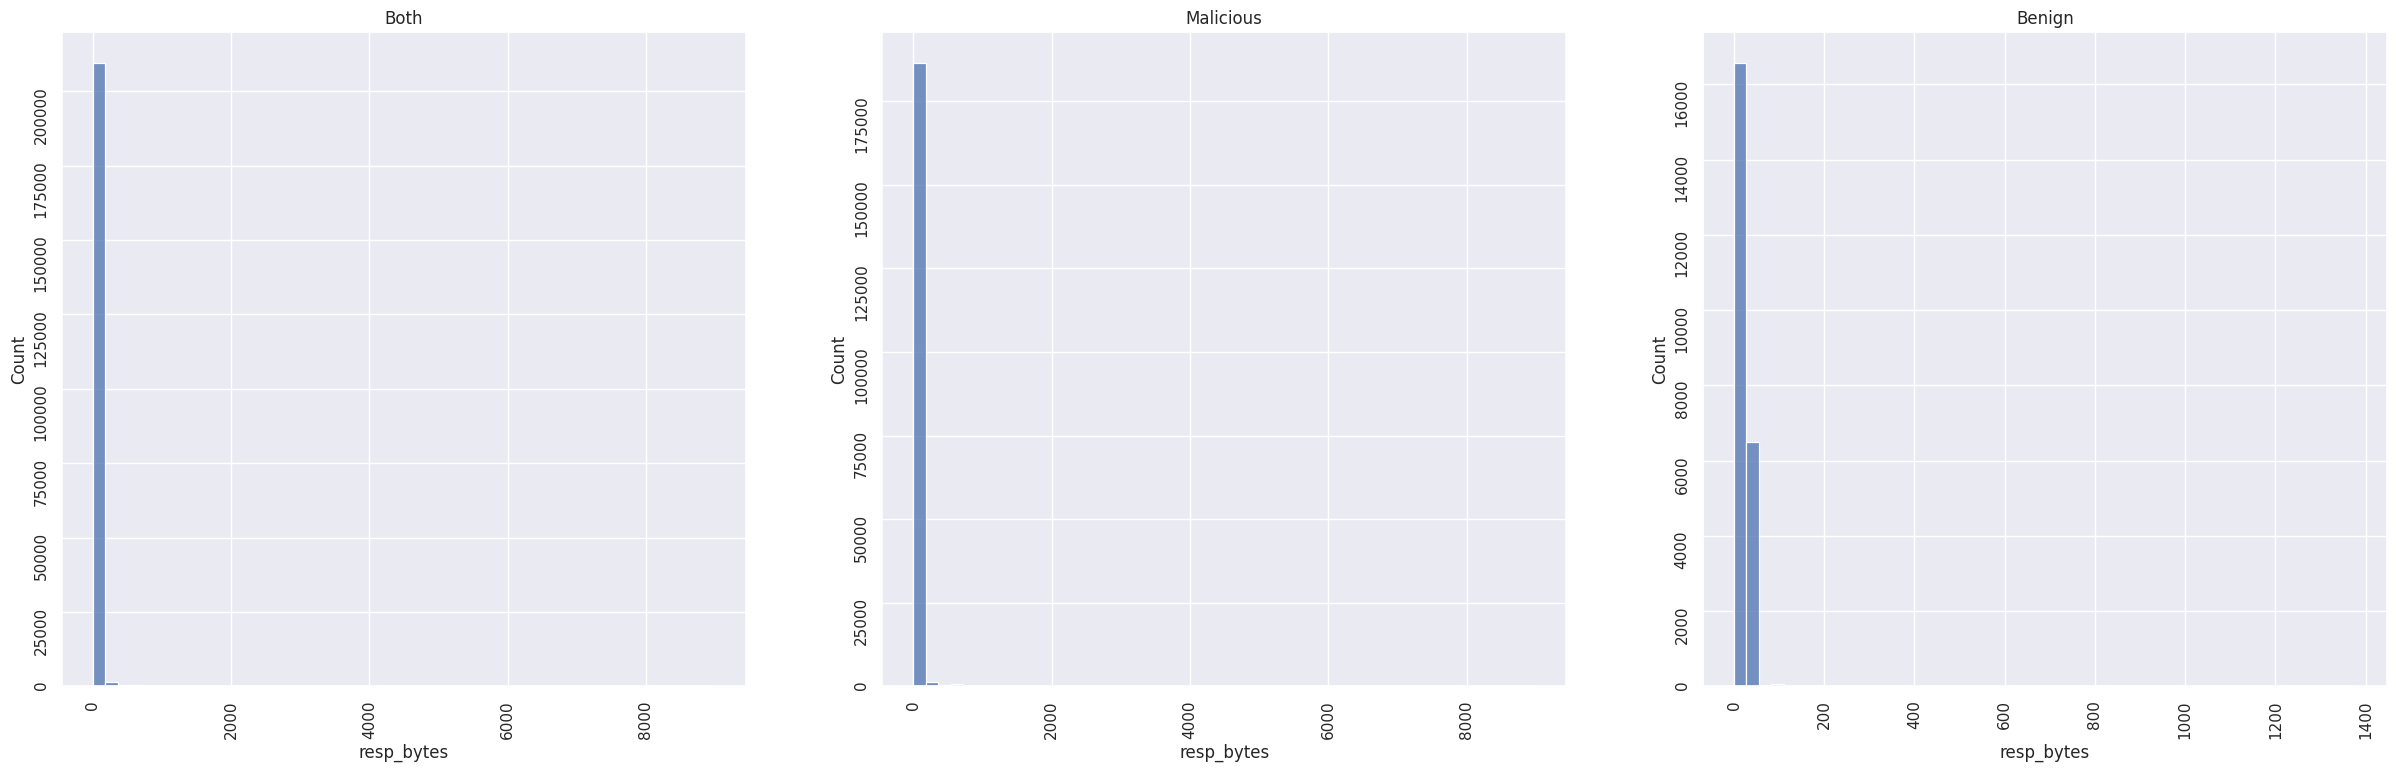

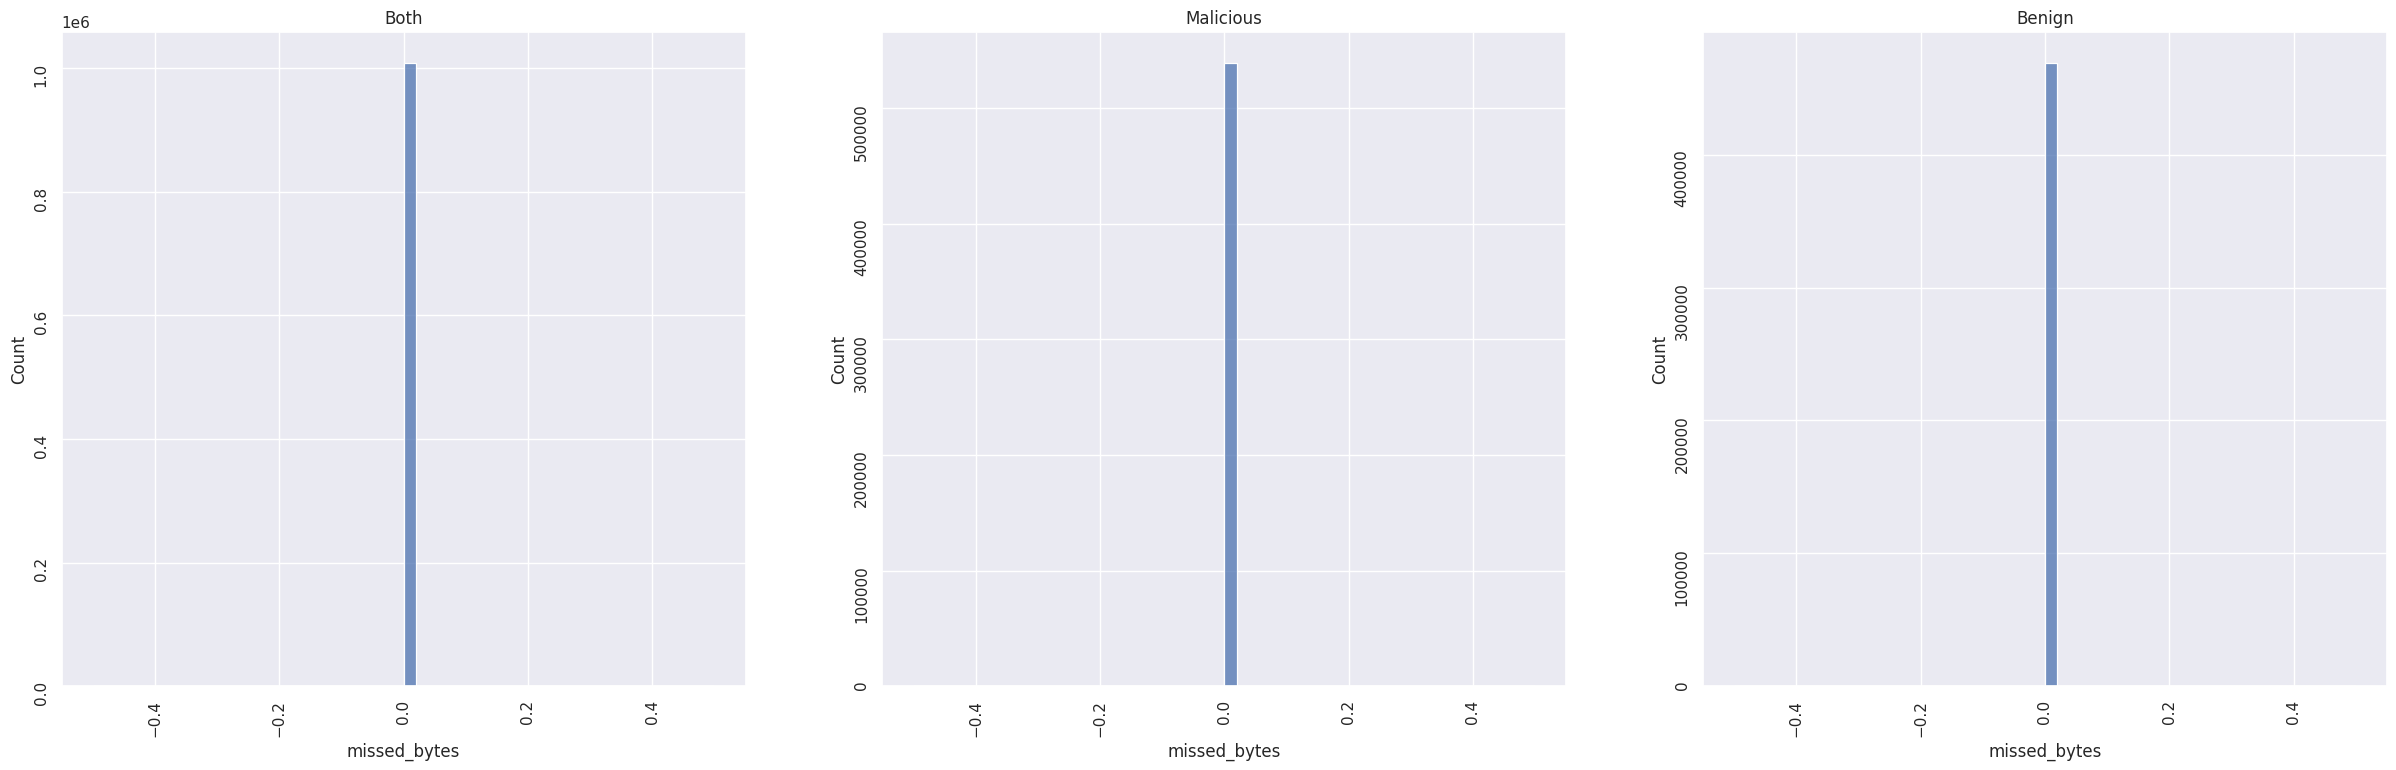

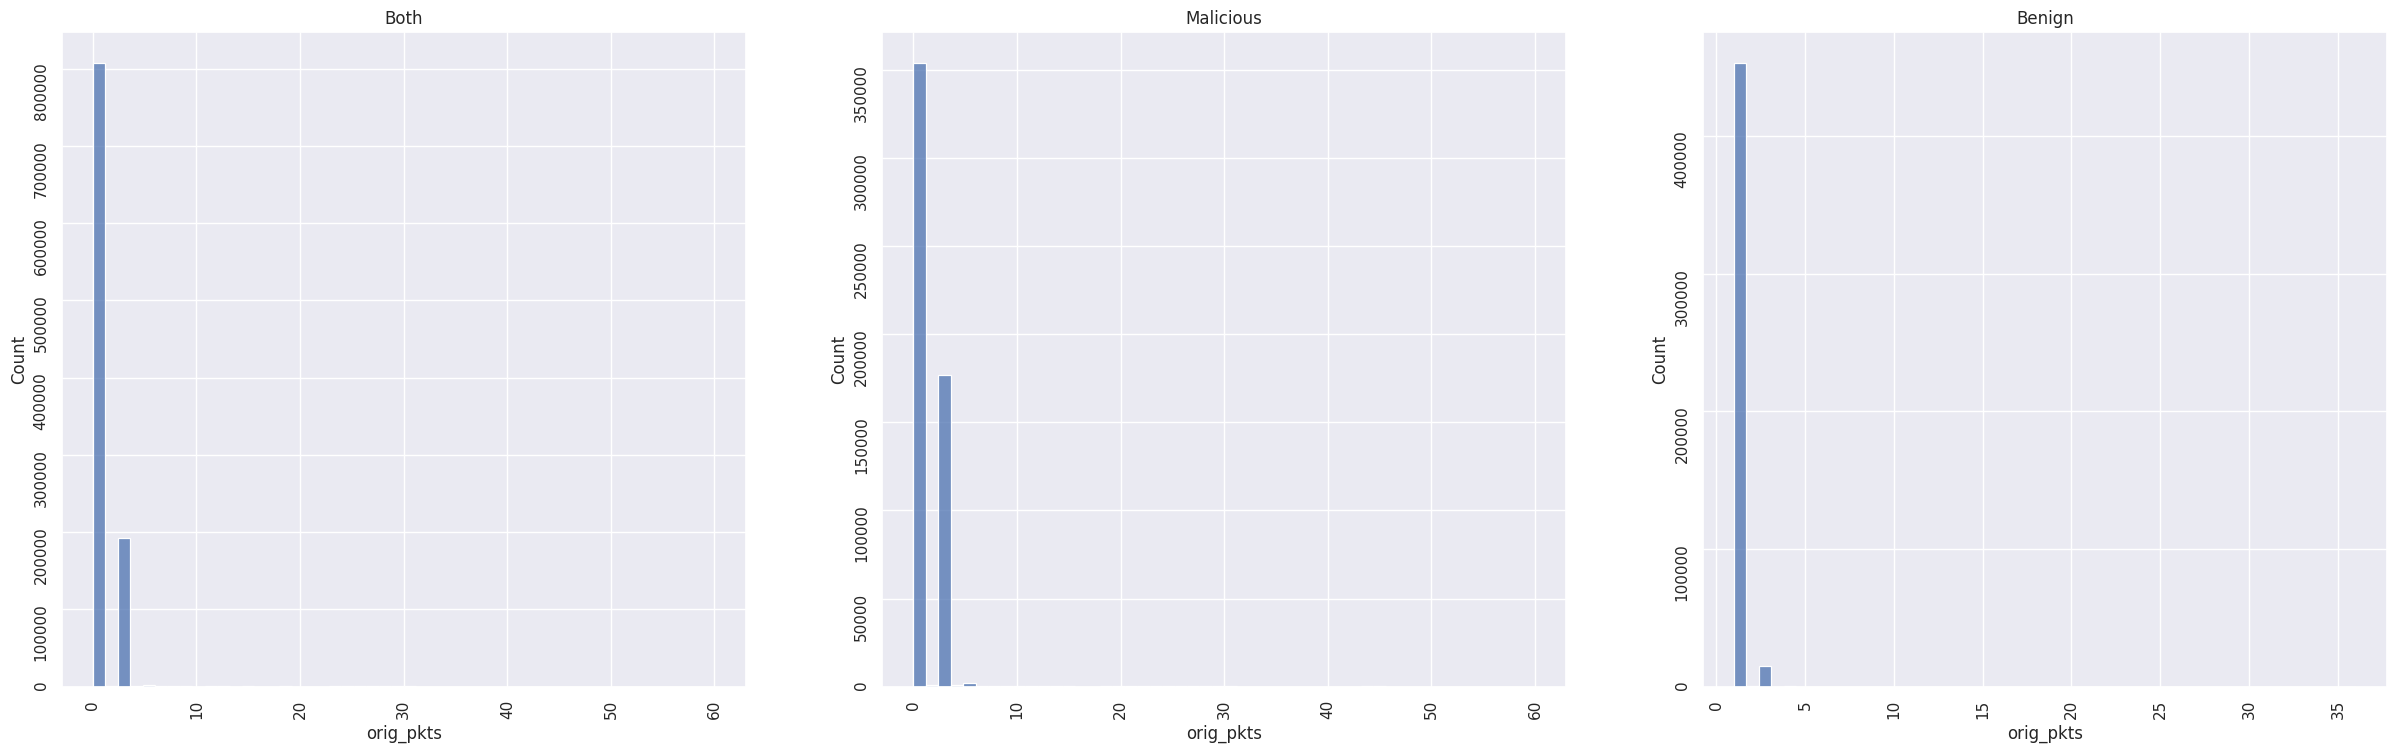

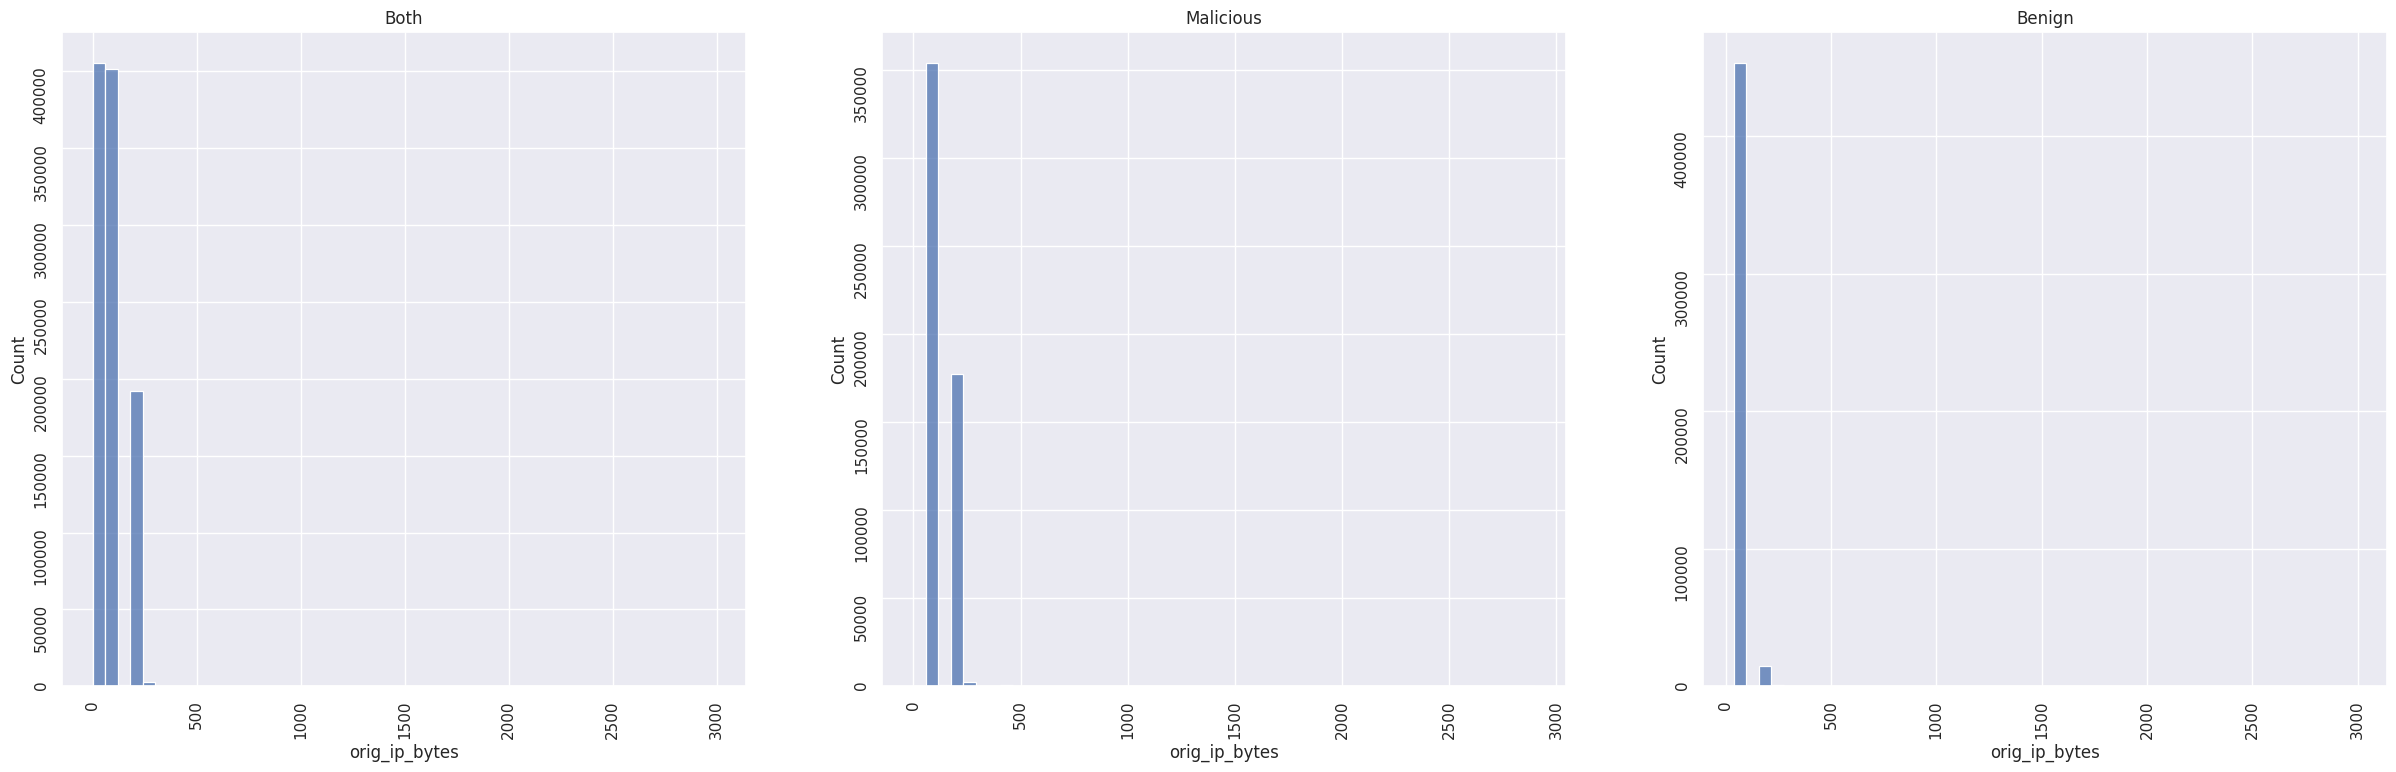

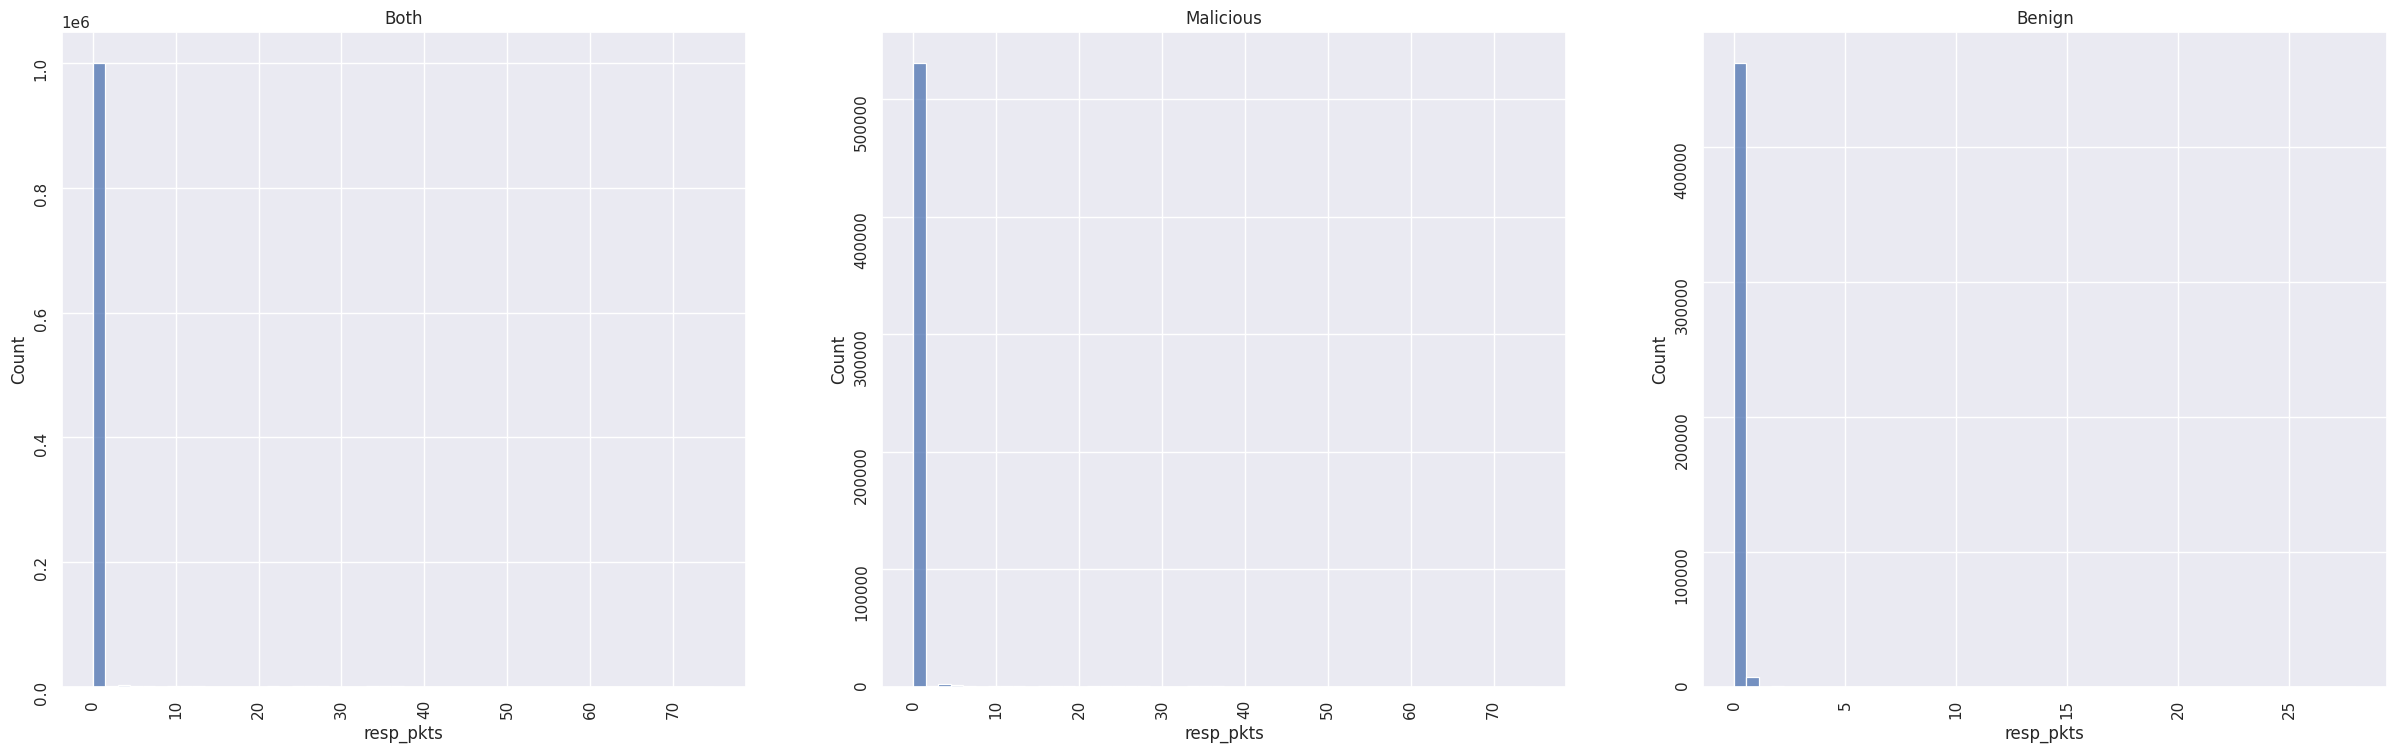

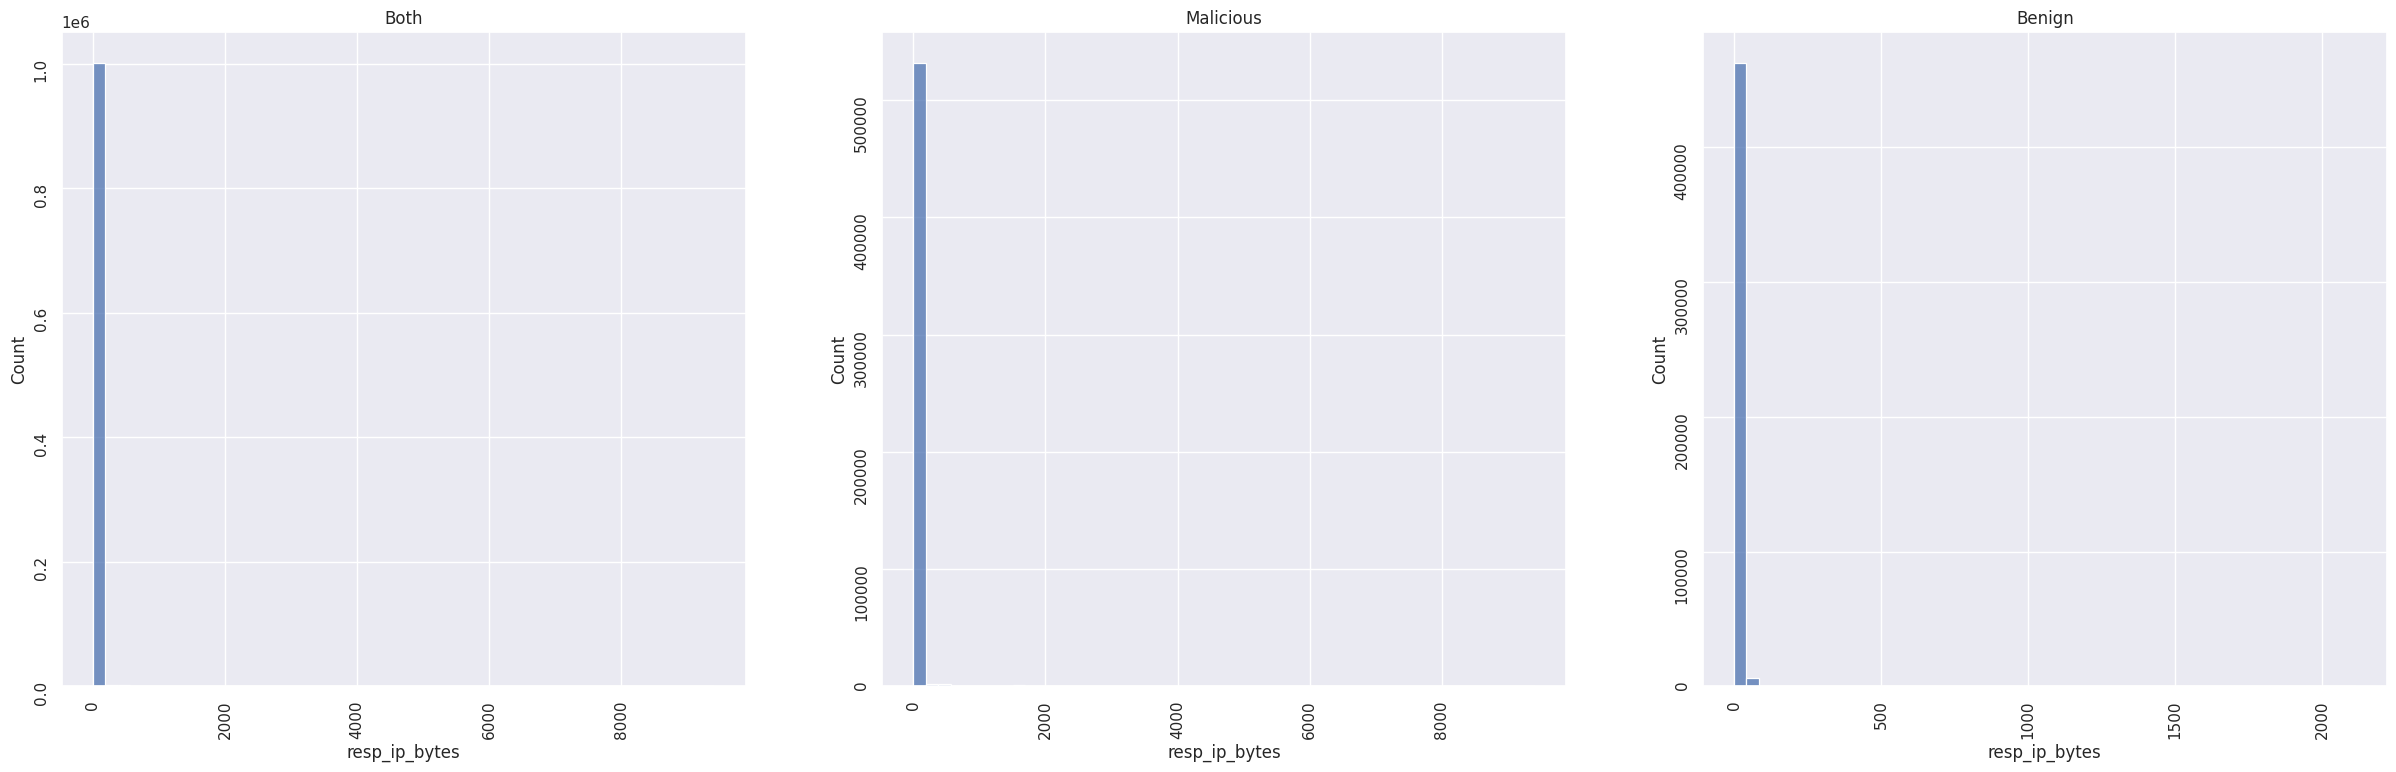

In [ ]:
for column in num_technical_columns:
  fig, axs = plt.subplots(nrows = 1, ncols = 3)
  fig.set_size_inches(30, 8.5)
  sns.histplot(data = networktraffic, x = column, ax = axs[0], bins = 50)
  axs[0].tick_params(labelrotation = 90)
  axs[0].set_title('Both')
  sns.histplot(data = networktraffic[networktraffic['label'] == 'Malicious'], x = column, ax = axs[1], bins = 50)
  axs[1].tick_params(labelrotation = 90)
  axs[1].set_title('Malicious')
  sns.histplot(data = networktraffic[networktraffic['label'] == 'Benign'], x = column, ax = axs[2], bins = 50)
  axs[2].tick_params(labelrotation = 90)
  axs[2].set_title('Benign')
  plt.show()
  plt.close()

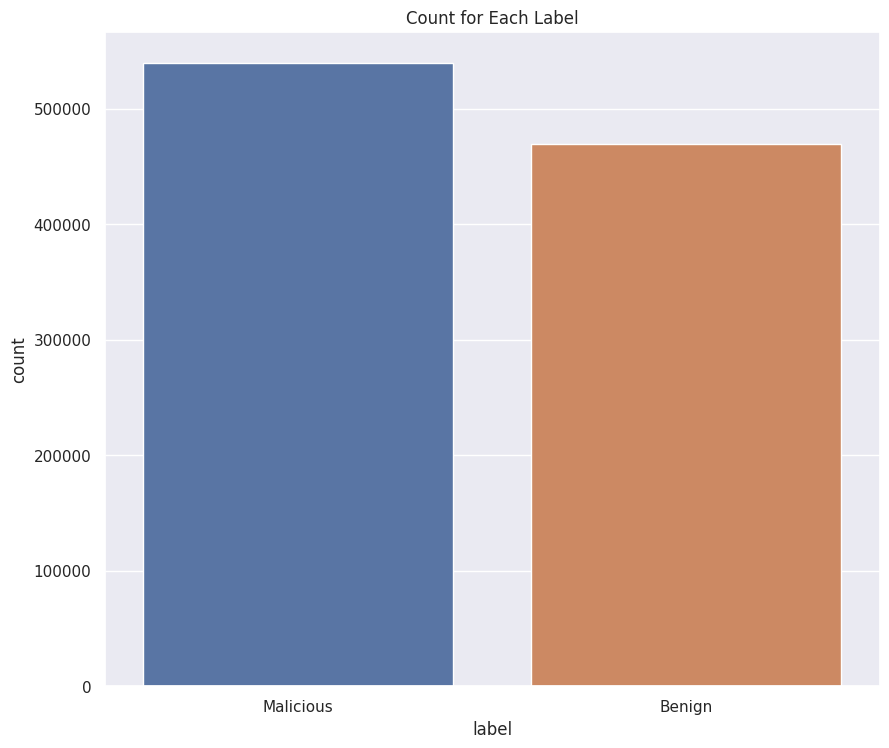

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(10, 8.5)
sns.countplot(data = networktraffic, x = 'label', ax = axs)
axs.set_title('Count for Each Label')
plt.show()
plt.close()

Das visualizações gráficas, é possível observar que os atributos "proto", "service", "orig_bytes", "resp_bytes", "orig_pkts", "orig_ip_bytes", "resp_pkts" e "resp_ip_bytes" são aqueles que apresentaram uma maior variação com relação às duas classes e, portanto, aparentam ser aquelas colunas com maior capacidade de discernimento. Por essa razão, elas foram as escolhidas para a representação dos fluxos de rede durante a tarefa de construção do modelo, com exceção da coluna "service", a qual possuía muitos dados faltantes. Além disso, o balanço de entradas entre as classes é extremamente razoável, como pode ser visto no último gráfico acima, característica esta positiva em termos de treinamento do modelo por agregar conhecimentos de maneira mais homogênea entre ambas as categorias.

A seguir, tem-se uma visualização dos pontos por meio de um "Pair Plot", o qual associa cada atributo a cada outro dois a dois, permitindo avaliar o comportamento conjunto dos pares de colunas. A partir dele, é possível se ter uma idea da disposição espacial dos pontos e de sua correlação, o que abre os horizontes em termos de conhecimentos sobre o formato e a susceptibilidade dos dados a diferentes operações, potencialmente colaborando com a escolha do modelo. Apenas para fins dessa análise, a coluna "proto" foi formatada via "one-hot encoding", mas mais detalhes serão discutidos na próxima seção.

In [ ]:
columns_of_interest = ['proto', 'orig_bytes', 'resp_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes']

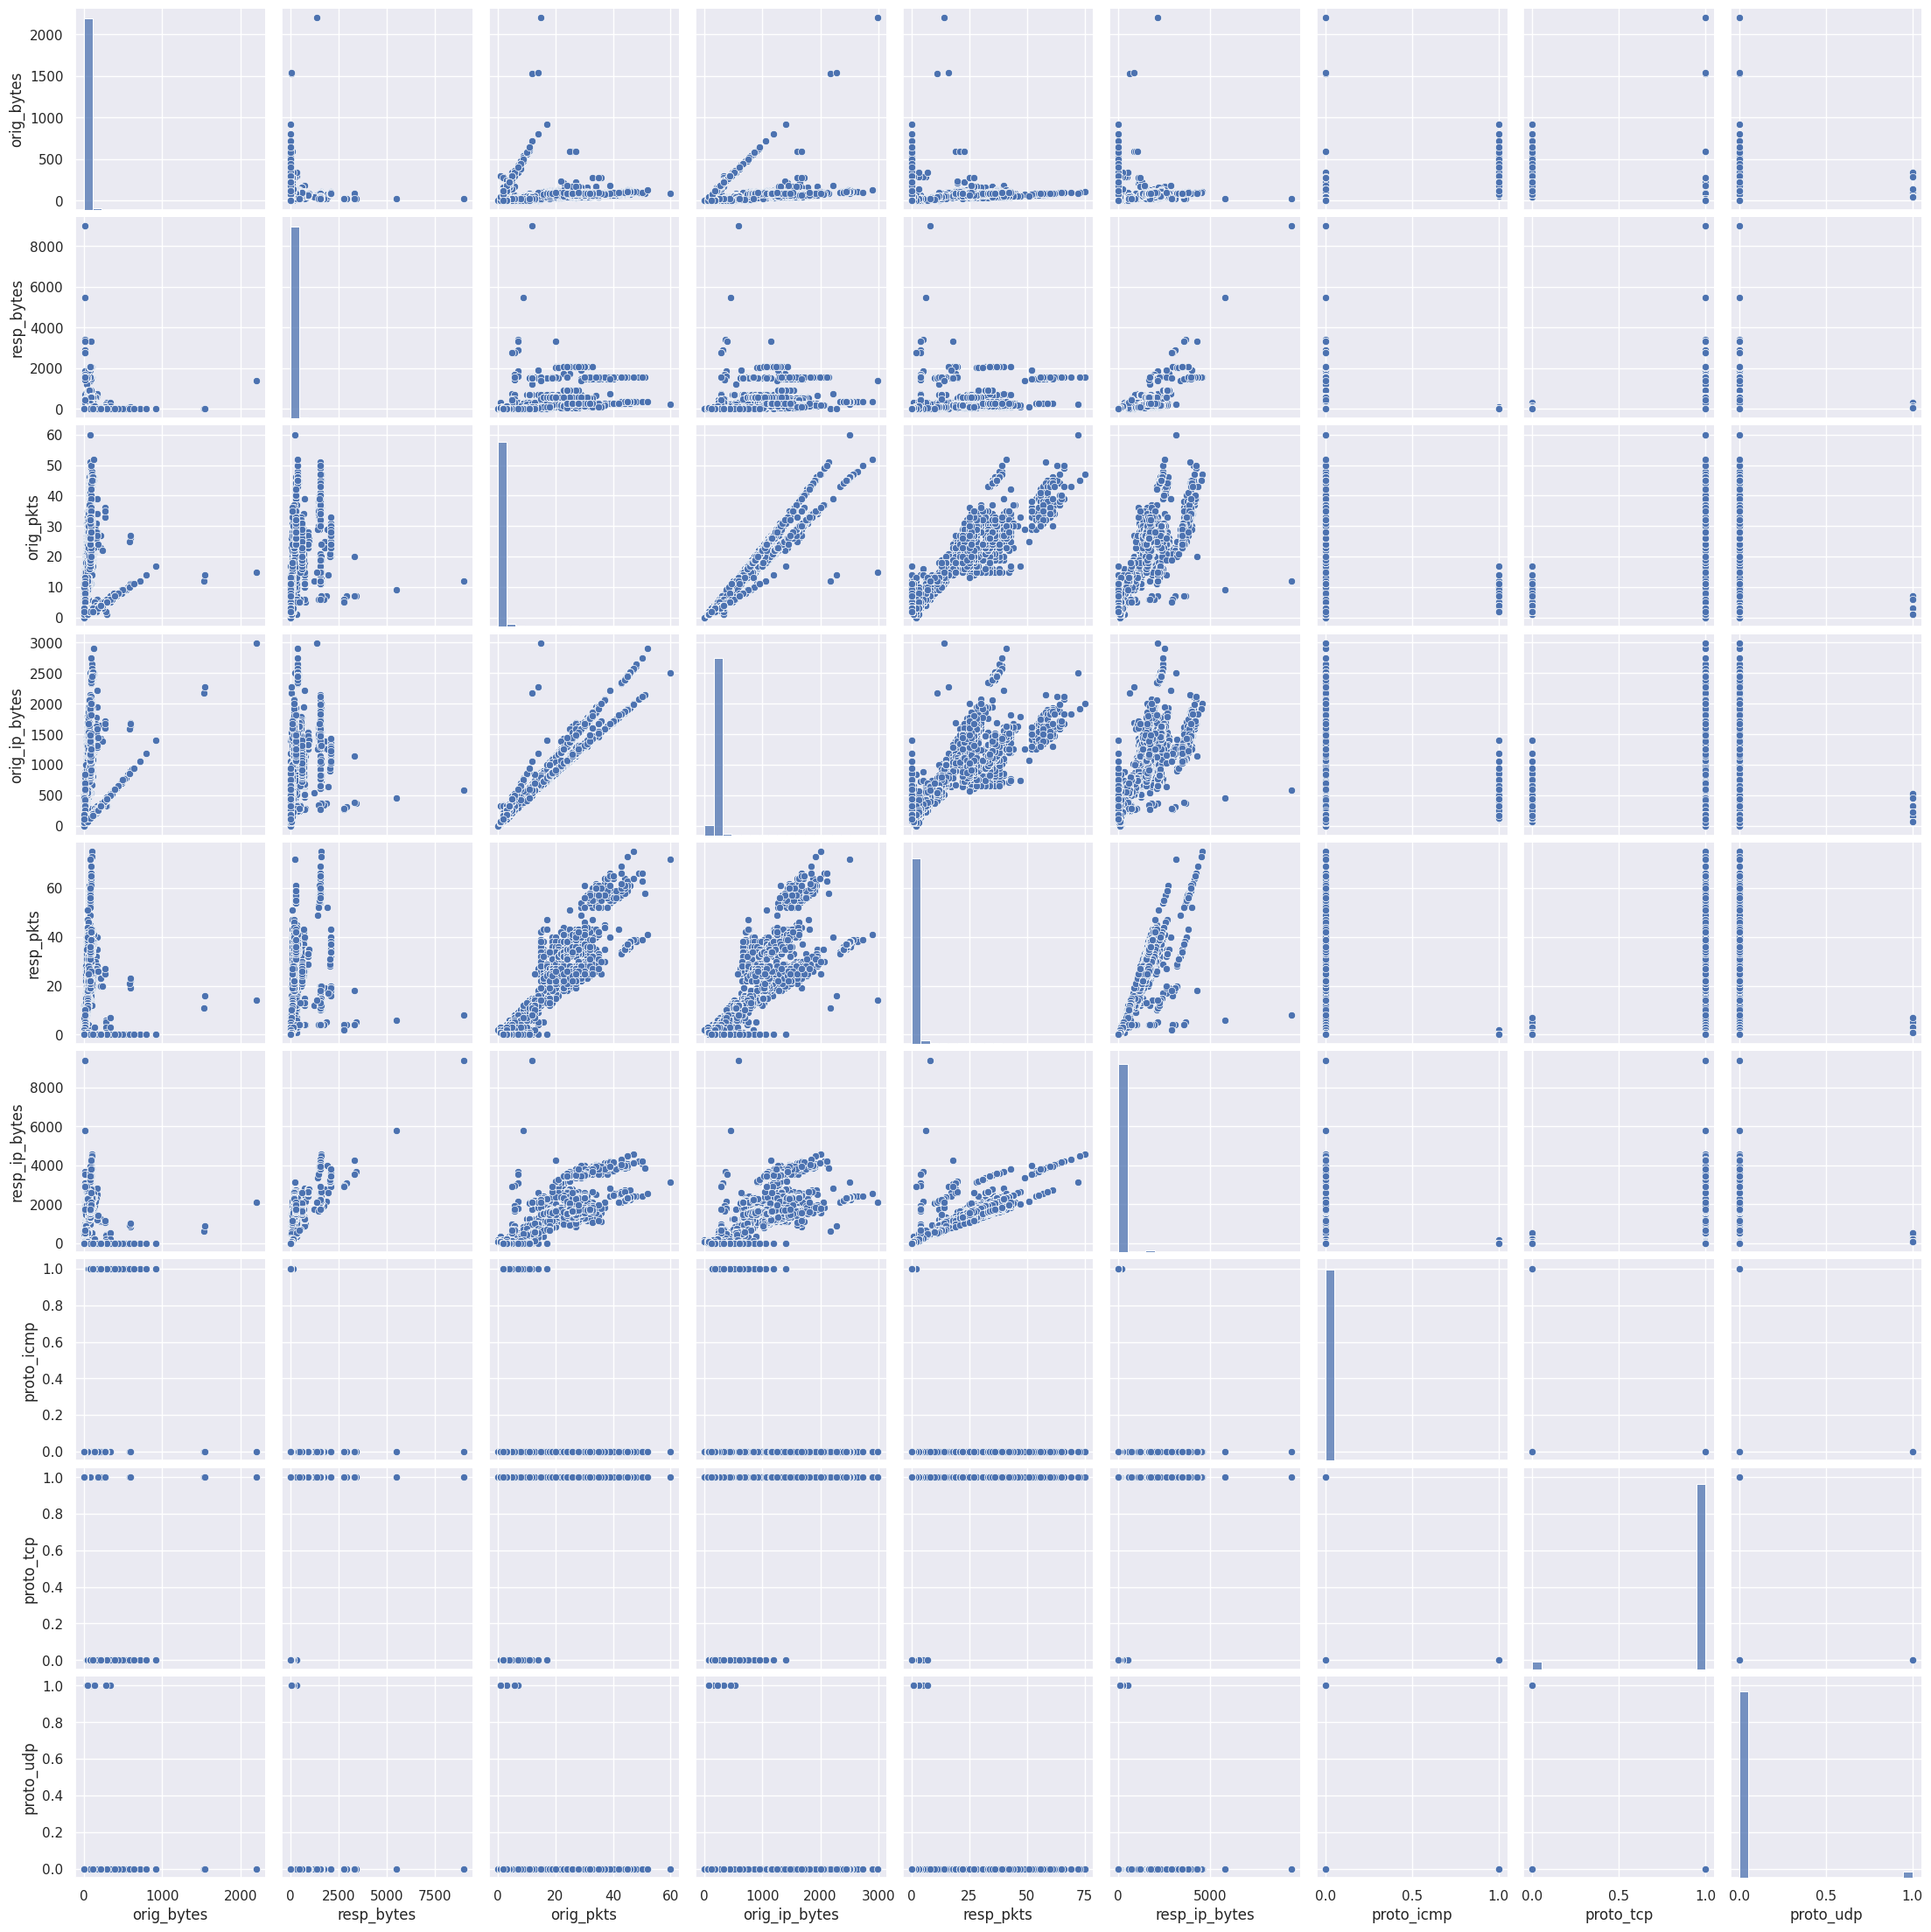

In [ ]:
dummies = pd.get_dummies(networktraffic[['proto']])
networktraffic_aux = networktraffic[columns_of_interest].copy()
networktraffic_aux = pd.concat([networktraffic_aux, dummies], axis = 1)
networktraffic_aux = networktraffic_aux.drop(['proto'], axis = 1)
networktraffic_aux = networktraffic_aux.dropna()

sns.pairplot(data = networktraffic_aux)
plt.show()
plt.close()

del networktraffic_aux, dummies

Finalizanto a etapa de entendimento dos dados, é possível analisar que a maior parte dos pares de atributos apresenta uma correlação positiva, mas alguns são independentes uns dos outros. Reavaliando os histogramas com as distribuições de seus valores, também é possível notar que, por mais que os atributos selecionados tenham apresentado a maior capacidade de discernimento relativa, esta ainda não é exatamente elevada, com muitos pontos distribuídos sobre poucos valores de maneira discreta. Essa característica pode vir a ser um dificultante para a tarefa de classificação, na medida em que revela uma pouca variabilidade entre entradas relativas a classes diferentes.

## **Preparação dos Dados**

Retomando aquilo discutido na etapa anterior, a base escolhida apresenta várias entradas com valores faltantes, o que torna necessário alguma forma de tratamento. No caso, foi decidido por apenas eliminar tais entradas, já que a inferência de valores estaria fora de escopo. Além disso, definiu-se as colunas de interesse para a representação de uma instância de tráfego de rede como "proto", "orig_bytes", "resp_bytes", "orig_pkts", "orig_ip_bytes", "resp_pkts" e "resp_ip_bytes". O atributo "proto" consiste em dados categóricos e, portanto, foi necessária alguma forma de transformação para o seu estudo por abordagens numéricas. O escolhido foi uma codificação via "one-hot encoding", na qual, a partir de cada possível valor, foi criada uma nova coluna, com o valor 1 na categoria correspondente à entrada original e 0 nas demais. A escolha por essa codificação vem de sua simplicidade, além do fato de que não há muitos valores únicos na coluna original, de modo que as consequências para a dimensionalidade dos dados não sejam exacerbantes.

In [ ]:
networktraffic = networktraffic[columns_of_interest + ['label']]
networktraffic = networktraffic.dropna()
dummies = pd.get_dummies(networktraffic[['proto']])
networktraffic = pd.concat([networktraffic, dummies], axis = 1)
networktraffic = networktraffic.drop(['proto'], axis = 1)
real_labels = networktraffic['label'].copy()
networktraffic = networktraffic.drop(['label'], axis = 1)

A seguir, tem-se uma visualização da base de dados resultante em um espaço 2-dimensional via PCA ("Principal Component Analysis"), sendo as duas dimensões referentes às duas primeiras componentes principais e a coloração ("hue") referente à terceira componente principal.

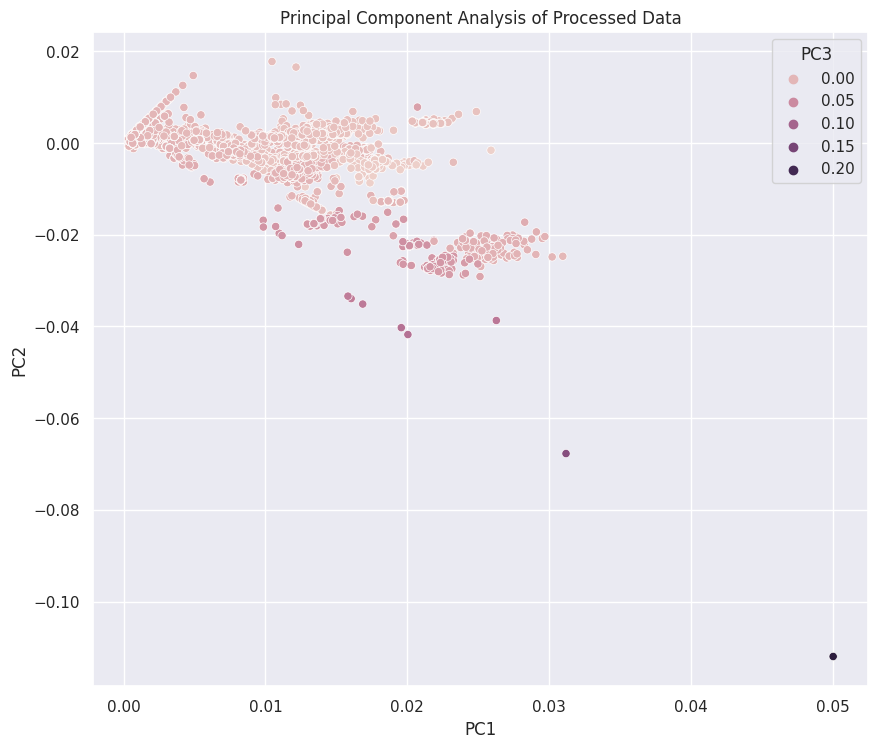

In [ ]:
pca = PCA(n_components = 3)
pca.fit(np.transpose(networktraffic.to_numpy()))

fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(10, 8.5)
sns.scatterplot(x = pca.components_[0], y = pca.components_[1], hue = pca.components_[2], ax = axs)
axs.set_xlabel('PC1')
axs.set_ylabel('PC2')
axs.legend(title = 'PC3')
axs.set_title('Principal Component Analysis of Processed Data')
plt.show()
plt.close()

A partir apenas destas três dimensões analisadas, não é possível notar nenhum discernimento natural entre os pontos. Existem alguns outliers espalhados pelos cantos do espaço, mas a maioria se concentra em uma região única. Nesta, ainda, também é possível notar algumas formações interessantes, como um grupo de pontos enfileirados de maneira perfeitamente linear, mas, no geral, a distância entre eles e o todo não é grande o suficiente para se imaginar alguma expressividade razoável.

A fim de avaliar esse comportamento mais a fundo, a seguir, é realizada uma plotagem extremamente similar, mas agora a coloração diz respeito ao rótulo de cada instância.

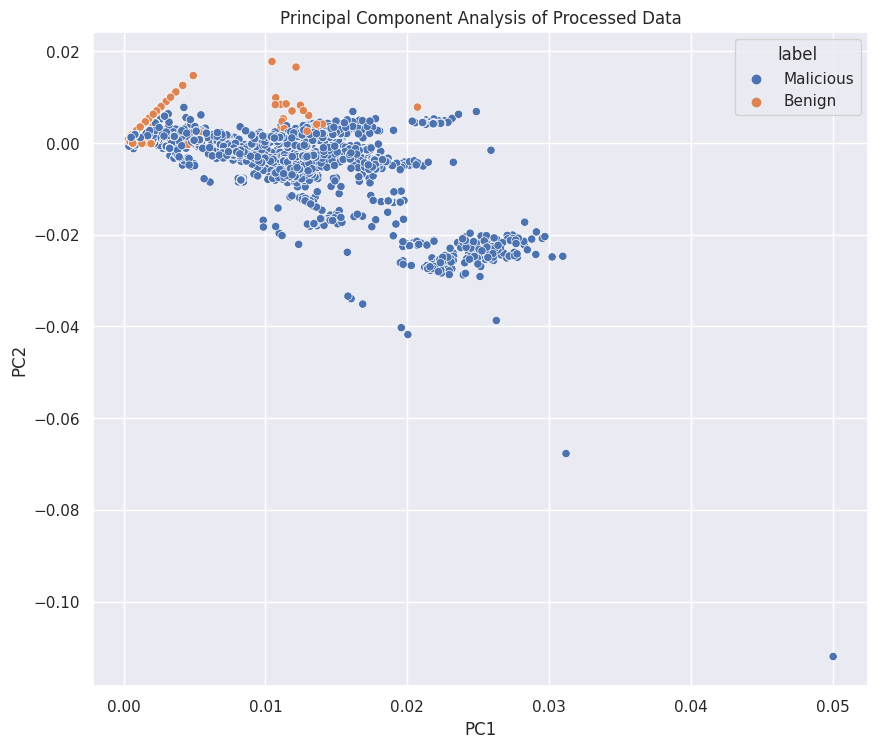

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(10, 8.5)
sns.scatterplot(x = pca.components_[0], y = pca.components_[1], hue = real_labels, ax = axs)
axs.set_xlabel('PC1')
axs.set_ylabel('PC2')
axs.set_title('Principal Component Analysis of Processed Data')
plt.show()
plt.close()

Desta vez, é possível observar que há alguma forma de discernimento entre os pontos. Particularmente, o componente linear observado anteriormente, assim como mais alguns pontos próximos, pertencem a uma das classes, enquanto os demais pertencem à outra, em uma formação que, por mais que próxima, permite uma separação visual nítida. Em termos de clusterização e de classificação, essa característica é positiva, já que, em alto nível, indica uma boa capacidade de discernimento entre as categorias.

Porém, outro detalhe que veio à tona com essa visualização diz respeito ao balanço entre as classes. Com o processamento feito sobre os dados, a proporção entre os rótulos ficou extremamente desbalanceada, com a vasta maioria pertencendo à classe "Malicious" (como é possível observar no gráfico a seguir). Para fins de treinamento, seria interessante que houvesse um bom balanceamento entre cada uma, de modo a homogeneizar os conhecimentos que podem ser extraídos. A fim de sanar isso, um subconjunto balanceado da base de dados processada contendo 50000 entradas foi selecionado para fins do restante do trabalho.

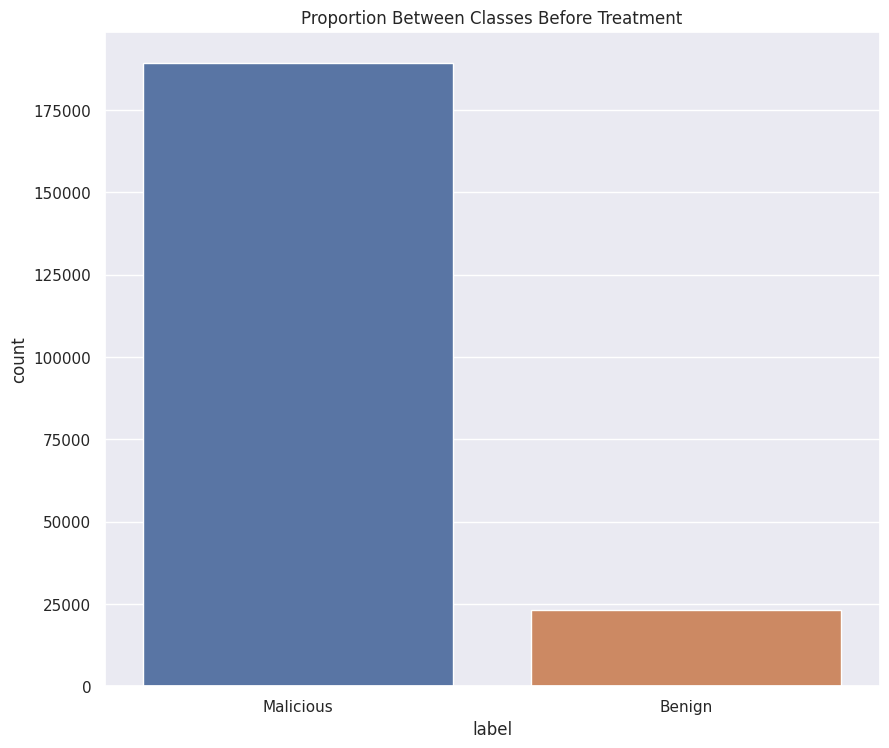

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(10, 8.5)
sns.countplot(data = pd.concat([networktraffic, real_labels], axis = 1), x = 'label', ax = axs)
plt.title('Proportion Between Classes Before Treatment')
plt.show()
plt.close()

In [ ]:
networktraffic = pd.concat([networktraffic, real_labels], axis = 1)
networktraffic = networktraffic.sort_values(by = 'label', ascending = False)
networktraffic = networktraffic.drop(networktraffic.index[0:162448])

# Shuffles dataframe rows.
networktraffic = networktraffic.sample(frac = 1, random_state = 42)

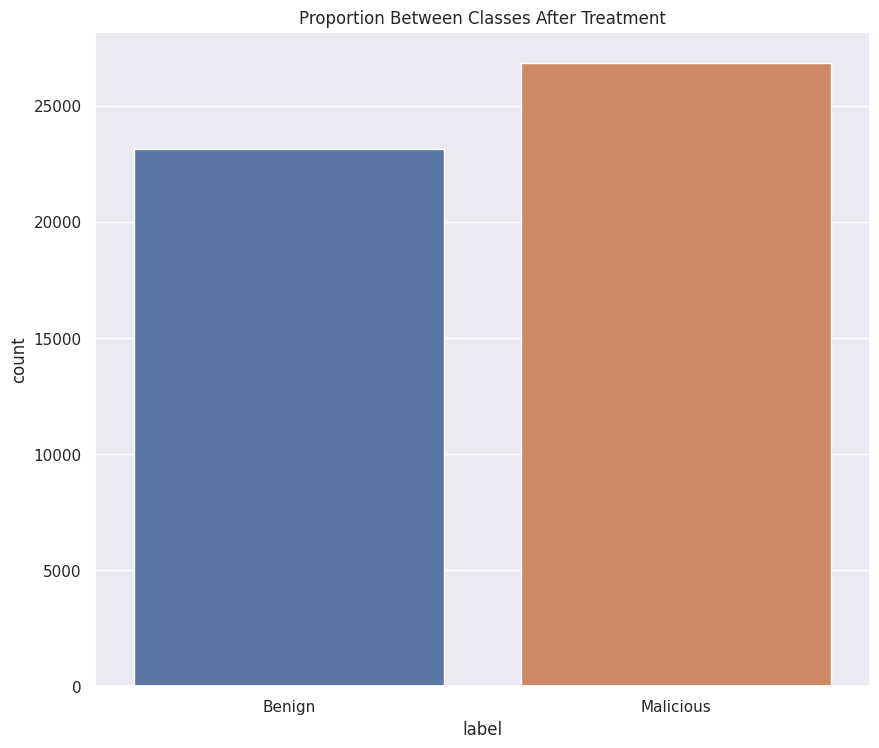

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(10, 8.5)
sns.countplot(data = networktraffic, x = 'label', ax = axs)
plt.title('Proportion Between Classes After Treatment')
plt.show()
plt.close()

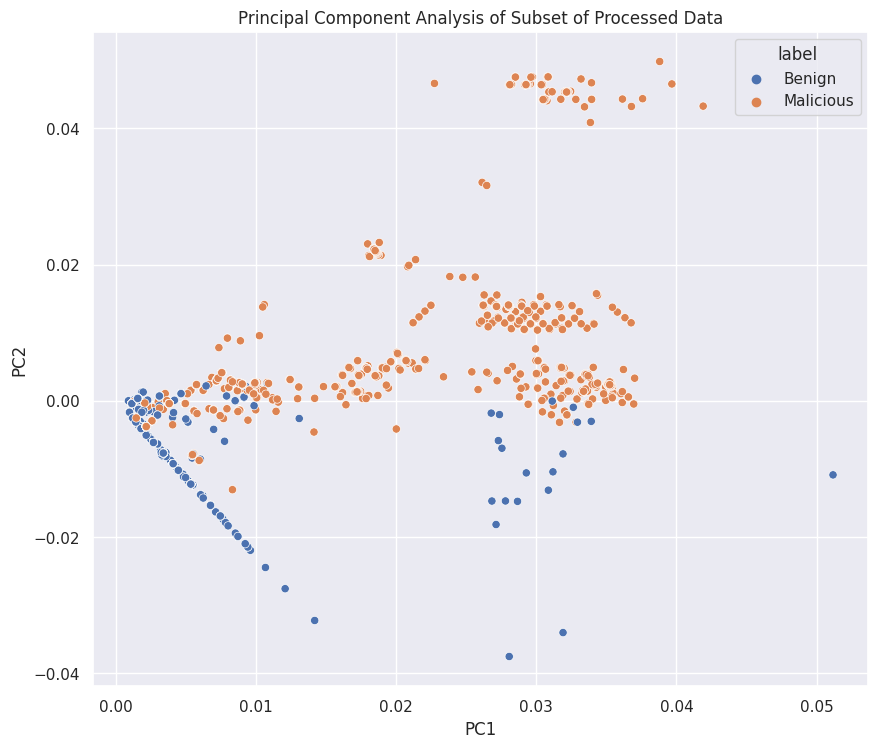

In [ ]:
pca = PCA(n_components = 2)
pca.fit(np.transpose(networktraffic.drop('label', axis = 1).to_numpy()))

fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(10, 8.5)
sns.scatterplot(x = pca.components_[0], y = pca.components_[1], hue = networktraffic['label'], ax = axs)
axs.set_xlabel('PC1')
axs.set_ylabel('PC2')
axs.set_title('Principal Component Analysis of Subset of Processed Data')
plt.show()
plt.close()

Finalmente, a base de dados é separada entre os conjuntos de treinamento e de teste, em uma proporção de 80-20. Essa separação é feita por meio de uma amostragem direta da base de dados original, sendo as primeiras 80% entradas dedicadas a treino e as últimas 20%, a teste.

In [ ]:
index = int(0.8 * networktraffic.shape[0])

In [ ]:
networktraffic_training = networktraffic.copy()
networktraffic_training = networktraffic_training.drop(networktraffic_training.index[index:networktraffic_training.shape[0]])

In [ ]:
networktraffic_test = networktraffic.copy()
networktraffic_test = networktraffic_test.drop(networktraffic_test.index[0:index])

In [ ]:
del networktraffic, real_labels

## **Modelagem**

A etapa de modelagem constitui o cerne da atividade de mineração de dados e, em grande medida, agrega as decisões mais delicadas para o sucesso do modelo. No caso, dada a representação dos pontos construída na etapa anterior, foi escolhido o algoritmo de classificação "Random Forest". Esse modelo consiste em um ensemble que realiza a união de vários classificadores baseados em árvores de decisão em um mecanismo robusto e com uma capacidade preditiva aprimorada. A ideia é que, a partir da base de dados, sejam feitas amostras via bootstrap e, para cada uma, um classificador de árvore de decisão seja treinado sobre um subconjunto, também amostral, dos atributos originais. Dada uma nova entrada, seu valor predito é o voto ponderado pela probabilidade estimada para cada uma das "árvores na floresta".

O "Random Forest" - particularmente, a implementação presente na biblioteca SciKit Learn - apresenta diversos parâmetros para o controle de seu treinamento e de sua predição. Em particular, há interesse nos parâmetros "n_estimators", o qual controla a quantidade de classificadores utilizada no ensemble, "min_samples_split", o qual define a quantidade mínima de entradas que deve haver em um nó interno para que esse seja quebrado, e "max_features", o qual ajusta a quantidade de atributos amostrados do conjunto de dados. Cada um desses apresenta um impacto diferente na especificidade do modelo, em seu ajuste com relação à base e em outros quesitos, como viés e variância.

A fim de se avaliar o comportamento do modelo conforme sua variação, de modo a se orientar a escolha adequada do valor de cada um, três testes foram realizados. Em cada, foram utilizados os demais parâmetros no valor default, uma mesma seed randômica e a base de dados inteira como amostra para todas as árvores (ao invés do bootstrap) a fim de se normalizar o espaço de testes. Em seguida, os três modelos foram treinados nos mesmos conjuntos de treino para diferentes valores dos parâmetros de interesse. Finalmente, foram computadas as respectivas taxas de acerto com relação aos mesmos conjuntos de teste e os resultados foram plotados nos gráficos a seguir.

In [ ]:
representative_columns = ['orig_bytes', 'resp_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp']

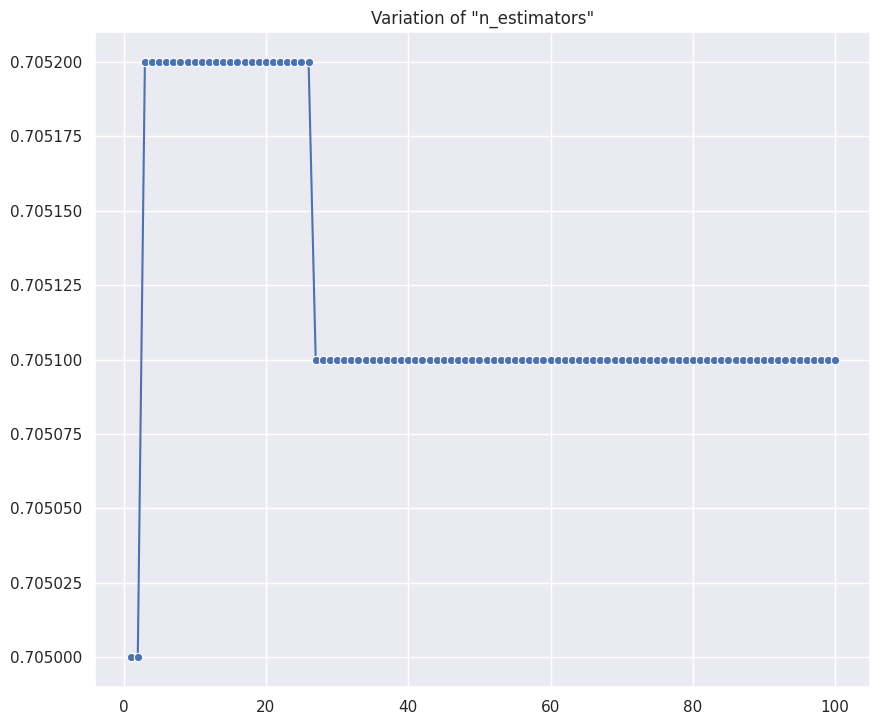

In [ ]:
# Evaluates the variation of n_estimators
accuracy = []
for value in np.linspace(1, 100, num = 100):
  model = RandomForestClassifier(n_estimators = int(value), bootstrap = False, random_state = 42)
  model = model.fit(networktraffic_training[representative_columns], networktraffic_training['label'])
  results = model.predict(networktraffic_test[representative_columns])
  accuracy.append((pd.Series(results).reset_index(drop = True) == pd.Series(networktraffic_test['label']).reset_index(drop = True)).sum() / networktraffic_test.shape[0])

fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(10, 8.5)
sns.lineplot(x = np.linspace(1, 100, num = 100), y = accuracy, marker = 'o', ax = axs)
axs.set_title('Variation of "n_estimators"')
plt.show()
plt.close()

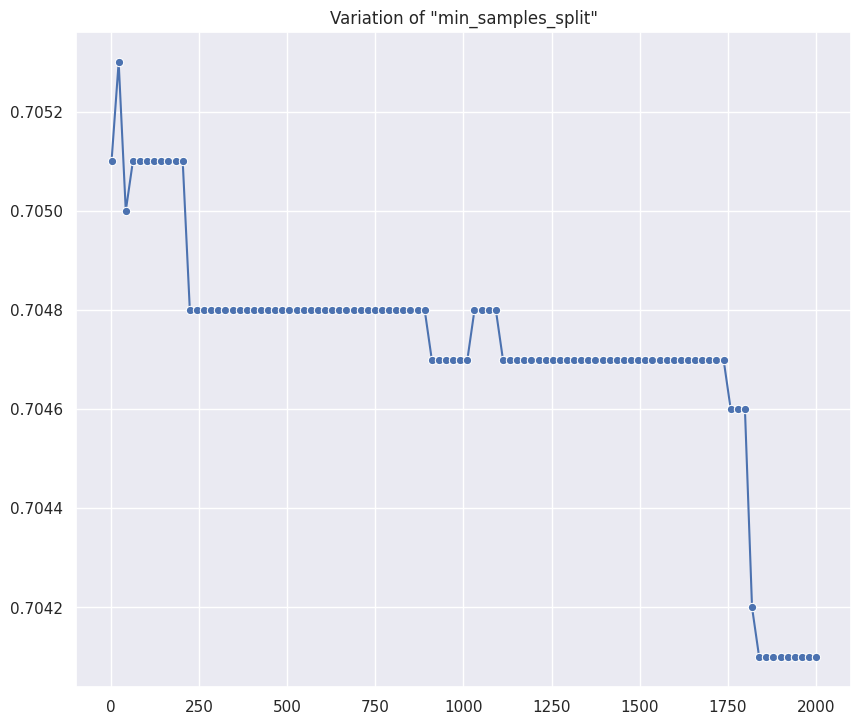

In [ ]:
# Evaluates the variation of min_samples_split
accuracy = []
for value in np.linspace(2, 2000, num = 100):
  model = RandomForestClassifier(min_samples_split = int(value), bootstrap = False, random_state = 42)
  model = model.fit(networktraffic_training[representative_columns], networktraffic_training['label'])
  results = model.predict(networktraffic_test[representative_columns])
  accuracy.append((pd.Series(results).reset_index(drop = True) == pd.Series(networktraffic_test['label']).reset_index(drop = True)).sum() / networktraffic_test.shape[0])

fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(10, 8.5)
sns.lineplot(x = np.linspace(2, 2000, num = 100), y = accuracy, marker = 'o', ax = axs)
axs.set_title('Variation of "min_samples_split"')
plt.show()
plt.close()

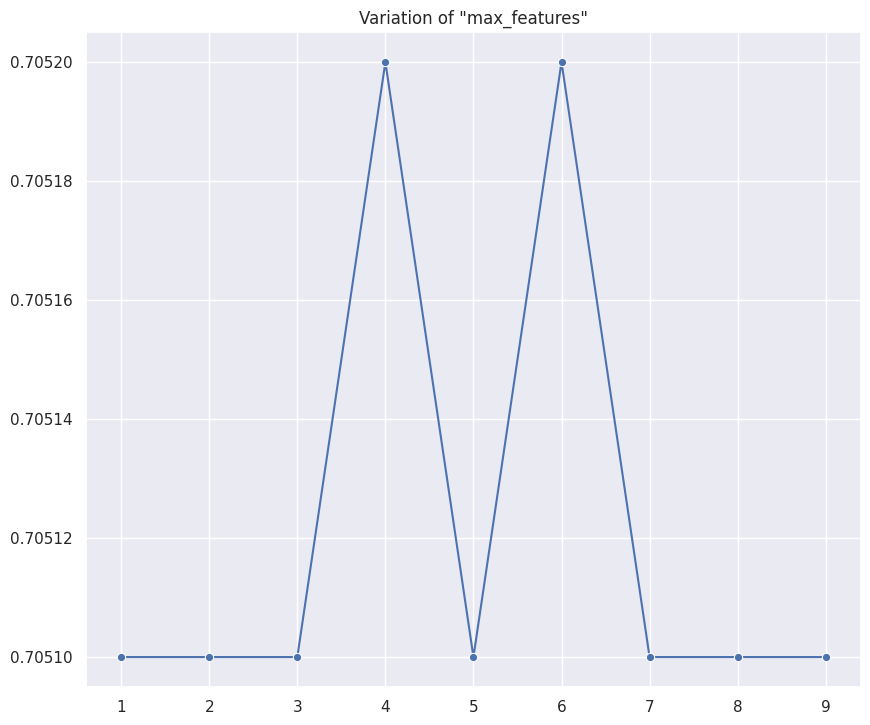

In [ ]:
# Evaluates the variation of max_features
accuracy = []
for value in np.linspace(1, 9, num = 9):
  model = RandomForestClassifier(max_features = int(value), bootstrap = False, random_state = 42)
  model = model.fit(networktraffic_training[representative_columns], networktraffic_training['label'])
  results = model.predict(networktraffic_test[representative_columns])
  accuracy.append((pd.Series(results).reset_index(drop = True) == pd.Series(networktraffic_test['label']).reset_index(drop = True)).sum() / networktraffic_test.shape[0])

fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(10, 8.5)
sns.lineplot(x = np.linspace(1, 9, num = 9), y = accuracy, marker = 'o', ax = axs)
axs.set_title('Variation of "max_features"')
plt.show()
plt.close()

De maneira geral, é possível observar que há alguns valores que apresentaram melhores resultados em comparação aos demais e, portanto, serão os escolhidos para o modelo final. Entretanto, um detalhe interessante é o fato de que a taxa de acertos não sofreu variações significativas entre os testes, sendo, inclusive, que as variações foram mínimas, talvez uma diferença na classificação de 5 pontos. Essa característica pode indicar uma grande rigidez por parte do modelo quando aplicado sobre essa base de dados, o que não seria um fator necessariamente negativo com uma taxa de acertos razoável. Entretanto, o observado nessa análise preliminar foi algo próximo de 70%, o que não é exatamente o mais satisfatório no domínio de segurança de redes (potencialmente, de informações sensíveis). Dentre as razões que se estipula para esse fenômeno, incluem-se uma má escolha dos atributos para representar os pontos, uma inadequação do modelo escolhido com o formato dos dados ou mesmo uma baixa capacidade de distinção entre um subconjunto de pontos pertencentes a ambas as classes.

In [ ]:
# Final model based on best parameters.
model = RandomForestClassifier(n_estimators = 20, min_samples_split = 20, max_features = 4, bootstrap = False, random_state = 42)
model = model.fit(networktraffic_training[representative_columns], networktraffic_training['label'])
results = model.predict(networktraffic_test[representative_columns])
model_accuracy = (pd.Series(results).reset_index(drop = True) == pd.Series(networktraffic_test['label']).reset_index(drop = True)).sum() / networktraffic_test.shape[0]
model_error_rate = 1 - model_accuracy

## **Apresentação e Validação dos Resultados**

O modelo, após treinado, foi aplicado sobre o conjunto de teste para a obtenção dos rótulos preditos. A partir dessas informações, as duas métricas mais simples de serem computadas são a taxa de acertos ou acurácia (quantidade de rótulos corretos sobre quantidade total) e a taxa de erros (quantidade de rótulos incorretos sobre quantidade total). Retomando aquilo discutido na seção anterior, no processo de refinamento dos parâmetros, foi observado uma taxa de variabilidade dessas métricas extremamente baixa, o que, mesmo com a seleção dos melhores nas três categorias, mantêve-se. Ao final, o modelo foi capaz de predizer corretamente 70.52% dos pontos. A seguir, dois gráficos são plotados, nos quais as entradas estão distribuídas em um espaço 2-dimensional por meio de suas duas primeiras componentes principais. No primeiro, há uma comparação entre os rótulos reais e os preditos por meio da coloração e, no segundo, os pontos preditos incorretamente são destacados em uma escala de cinza.

In [ ]:
model_accuracy

0.7052

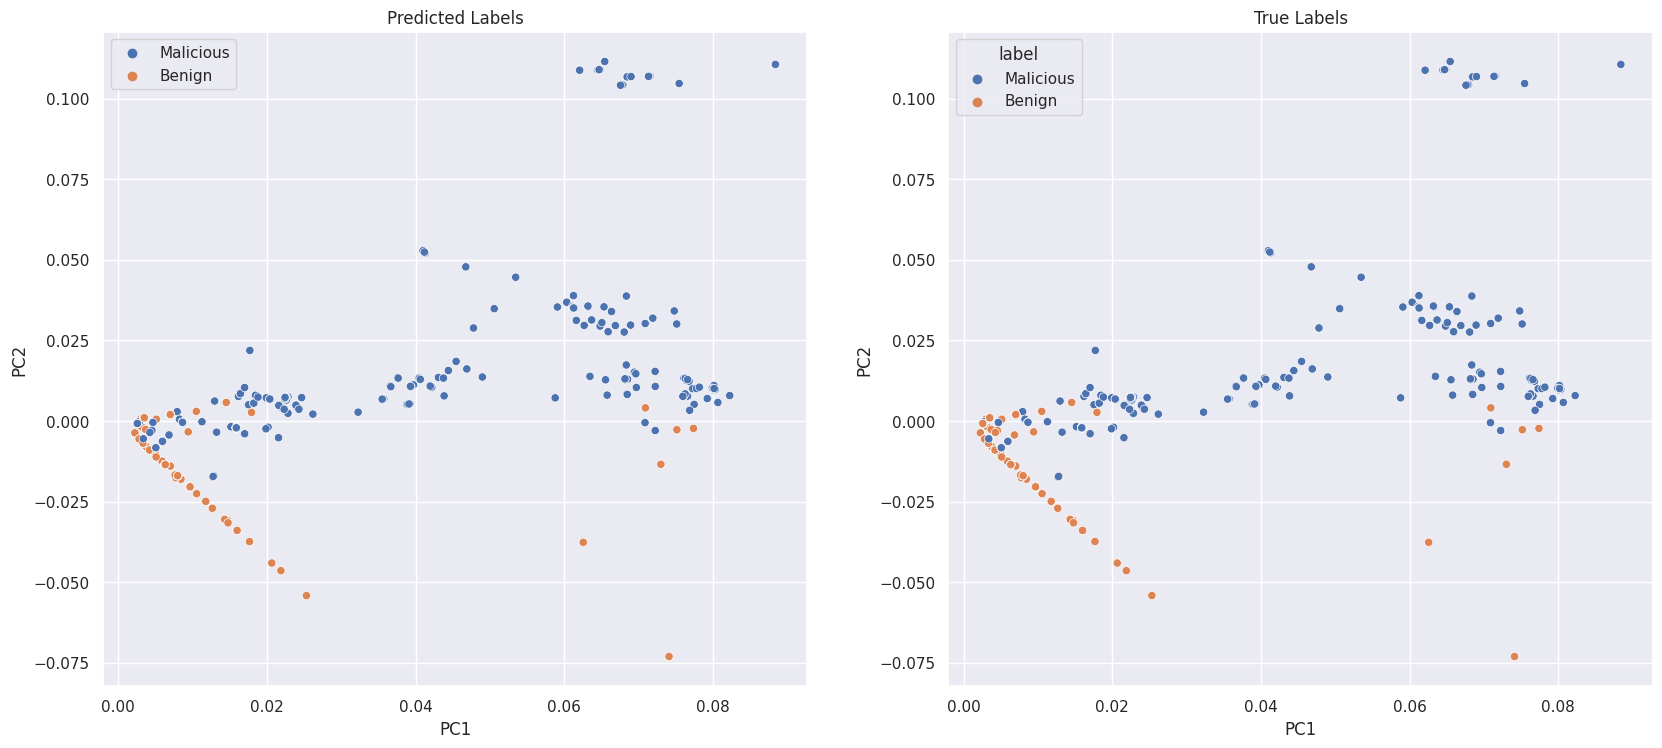

In [ ]:
pca = PCA(n_components = 2)
pca.fit(np.transpose(networktraffic_test.drop('label', axis = 1).to_numpy()))

fig, axs = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 8.5)
sns.scatterplot(x = pca.components_[0], y = pca.components_[1], hue = results, ax = axs[0])
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')
axs[0].set_title('Predicted Labels')
sns.scatterplot(x = pca.components_[0], y = pca.components_[1], hue = networktraffic_test['label'], ax = axs[1])
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')
axs[1].set_title('True Labels')
plt.show()
plt.close()

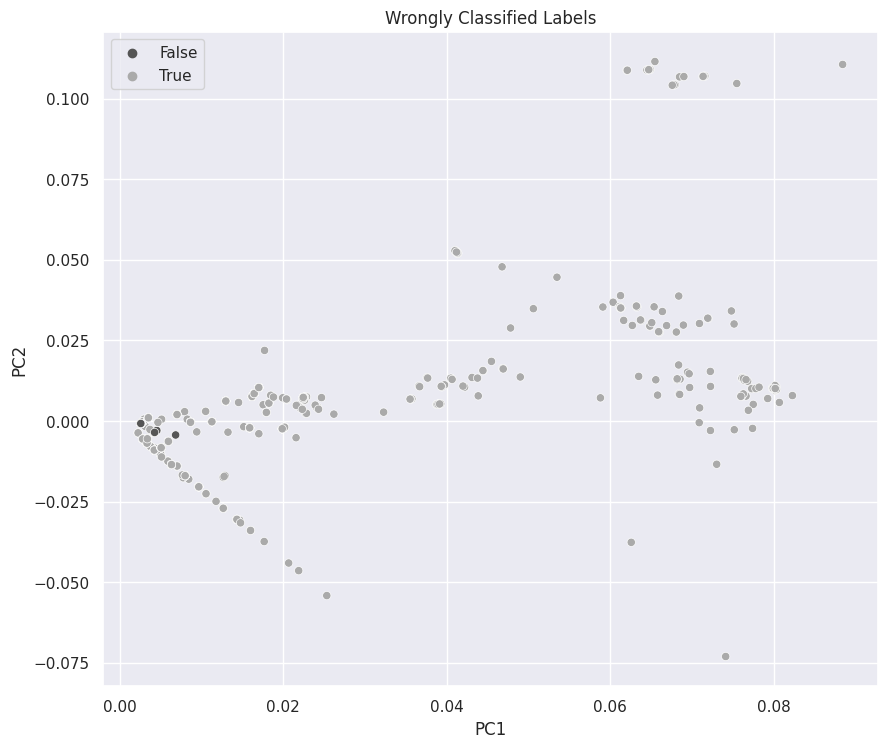

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(10, 8.5)
sns.scatterplot(x = pca.components_[0], y = pca.components_[1], hue = (pd.Series(results).reset_index(drop = True) == pd.Series(networktraffic_test['label']).reset_index(drop = True)), palette = 'gray', ax = axs)
axs.set_xlabel('PC1')
axs.set_ylabel('PC2')
axs.set_title('Wrongly Classified Labels')
plt.show()
plt.close()

Como esperado, toda a massa de erros está concentrada na área do gráfico com maior mistura entre ambos os rótulos, o que naturalmente agrega confusão no processo de classificação. Ainda, isso talvez possa indicar que alguma informação crítica que permita a separação dos dados esteja faltando (ou tenha sido ignorada na etapa de seleção das colunas relevantes), abrindo margem para melhoras no modelo.

Uma outra forma interessante de se avaliar a taxa de acertos do algoritmo preditivo é por meio de uma curva ROC ("Receiver Operating Characteristics"). Essa construção dispõe de maneira gráfica a relação entre a taxa de verdadeiros positivos e a taxa de falsos positivos com base no vetor de pontos ordenados pela sua "score" - uma taxa que o modelo deve atribuir a cada um com relação à sua probabilidade de pertencimento à classe "positiva" - e em diferentes thresholds para um ponto ser considerado, de fato, "positivo". A ideia é percorrer esse vetor iterativamente sob diferentes thresholds, computando as taxas de verdadeiros e falsos positivos e originando pontos no espaço que demonstram seu comportamento do mínimo ao máximo, de modo a se obter uma curva cujos formato e área abaixo abstraem em alguma medida a acurácia do modelo.

No caso, a "Random Forest" do Scikit Learn apresenta uma função de geração de probabilidades, as quais são computadas com base na média ponderada da razão de pontos pertencentes à classe positiva em uma dada folha em cada uma de suas árvores. A partir desse vetor, a curva é construída por meio da mesma biblioteca, sendo o resultado exposto a seguir.

In [ ]:
scores = pd.concat([pd.DataFrame(model.predict_proba(networktraffic_test[representative_columns]))[0].reset_index(drop = True), networktraffic_test['label'].reset_index(drop = True)], axis = 1)
scores = scores.sort_values(by = 0, ascending = False)

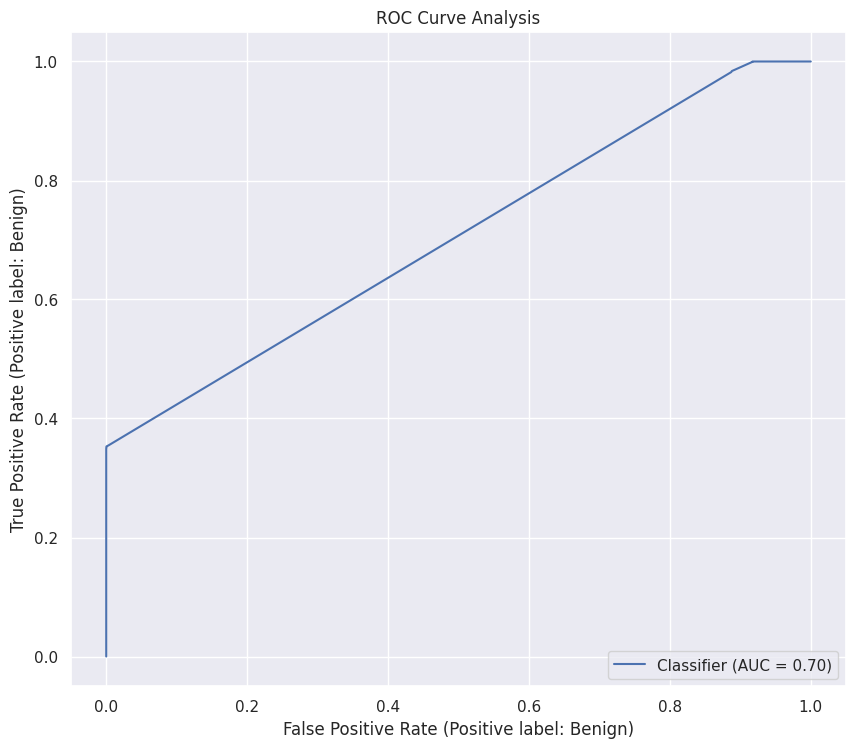

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(10, 8.5)
RocCurveDisplay.from_predictions(y_true = scores['label'], y_pred = scores[0], pos_label = 'Benign', ax = axs)
axs.set_title('ROC Curve Analysis')
plt.show()
plt.close()

A acurácia obtida é confirmada pelo valor da área sob a curva, avaliado em 0.70 (ou ~70%). Ainda, um detalhe interessante que pode ser observado é a existência de uma grande região de incerteza na categorização dos pontos, mapeada pela inclinação da curva em seu momento central. No início, houve uma grande certeza na classificação, sendo todas as entradas iniciais, isto é, com uma maior probabilidade de pertencerem à classe positiva, de fato pertencentes a essa categoria. As últimas entradas, ainda, também foram bem certeiras: aquelas com menor probabilidade de serem positivas, de fato, não eram. Porém, existe um meio termo no qual os pontos apresentam uma probabilidade intermediária e, razoavelmente, alguns pertencem, enquantos outro não. Isso talvez possa ser um indicativo de uma região do espaço na qual o classificador teve dificuldades, novamente abrindo margem para questões sobre escolhas e adequação já mencionadas até o momento.

Por fim, é realizada uma análise estatística para se avaliar a significância dos resultados obtidos e a robustez do modelo quanto a variações nas entradas. A abordagem adotada foi a "K-Fold Cross Validation", na qual o conjunto total de dados é separado em K grupos de mesmo tamanho, cada qual utilizado uma vez como conjunto de teste, sendo os demais seu respectivo conjunto de treino. Para cada partição, o modelo é treinado com os parâmetros selecionados anteriormente e seus valores de acurácia e de taxa de erro são computados. Com todos em mãos, é possível estimar sua média e variância, além de ser possível realizar a plotagem de um histograma com sua distribuição. A ideia é verificar como variações nessa seleção impactam os resultados do modelo, sendo um algoritmo robusto e que produza resultados relevantes aquele que apresente uma média homogênea e uma variância baixa, isto é, a seleção dos dados não impacta sua capacidade preditiva. A seguir, os resultados obtidos são dispostos, nos quais a linha vermelha diz respeito aos valores reais obtidos na etapa anterior.

In [ ]:
networktraffic = pd.concat([networktraffic_training, networktraffic_test])

# Shuffles dataframe rows.
networktraffic = networktraffic.sample(frac = 1, random_state = 39)

In [ ]:
# K-Fold Cross Validation
accuracy = []
error_rate = []
for index in np.linspace(0, 45000, 10):
  index = int(index)
  networktraffic_training = pd.concat([networktraffic.iloc[0:index], networktraffic.iloc[(index + 5000):networktraffic.shape[0]]])
  networktraffic_test = networktraffic.iloc[index:(index + 5000)].copy()
  model = RandomForestClassifier(n_estimators = 20, min_samples_split = 20, max_features = 4, bootstrap = False, random_state = 42)
  model = model.fit(networktraffic_training[representative_columns], networktraffic_training['label'])
  results = model.predict(networktraffic_test[representative_columns])
  acc = (pd.Series(results).reset_index(drop = True) == pd.Series(networktraffic_test['label']).reset_index(drop = True)).sum() / networktraffic_test.shape[0]
  accuracy.append(acc)
  error_rate.append(1 - acc)

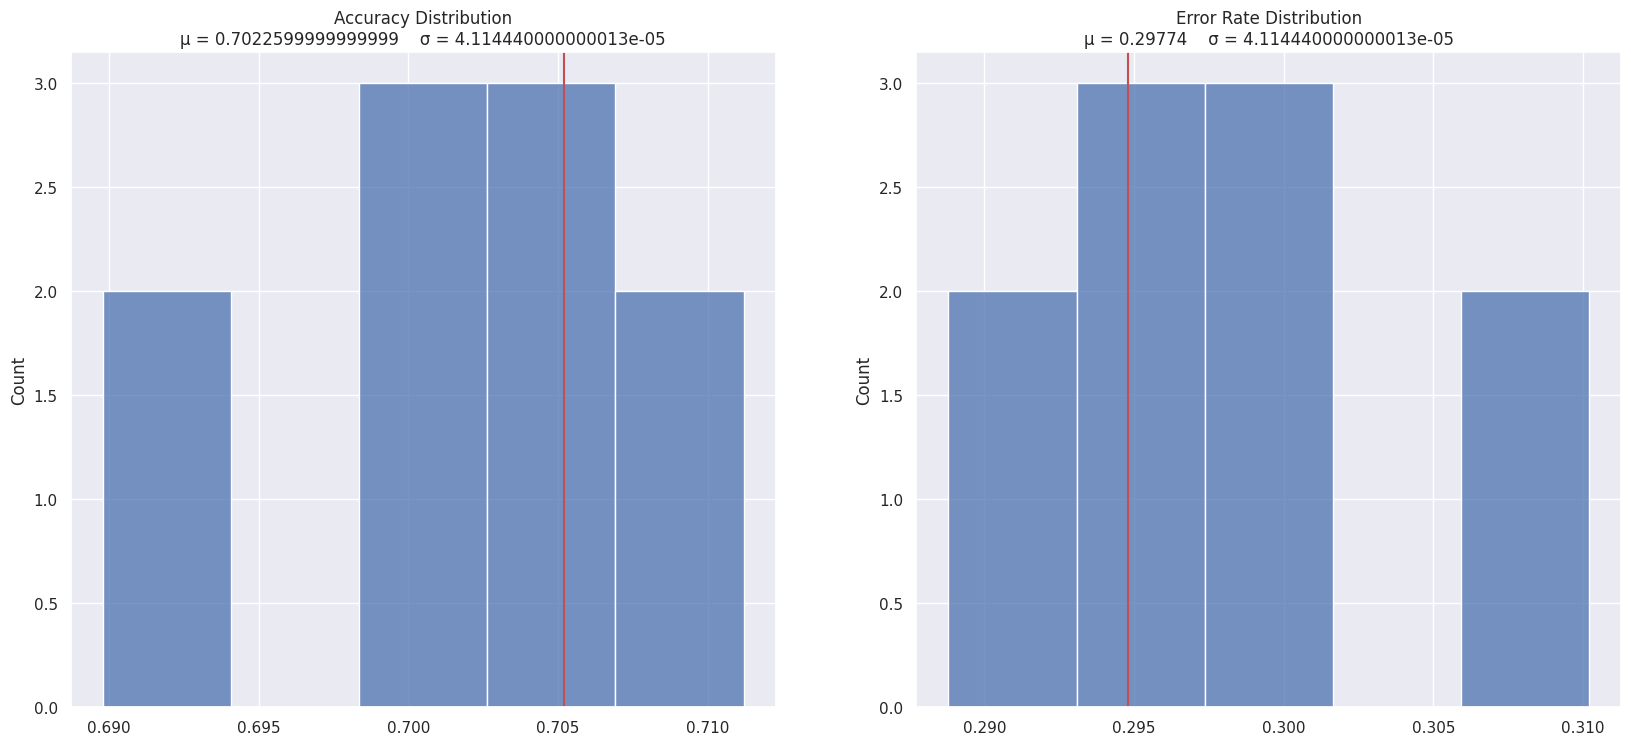

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 8.5)
sns.histplot(x = accuracy, ax = axs[0])
axs[0].set_title('Accuracy Distribution\nμ = ' + str(np.mean(accuracy)) + '    σ = ' + str(np.power(np.std(accuracy), 2)))
axs[0].axvline(x = model_accuracy, ymin = 0, ymax = 1, color = 'r')
sns.histplot(x = error_rate, ax = axs[1])
axs[1].set_title('Error Rate Distribution\nμ = ' + str(np.mean(error_rate)) + '    σ = ' + str(np.power(np.std(error_rate), 2)))
axs[1].axvline(x = model_error_rate, ymin = 0, ymax = 1, color = 'r')
plt.show()
plt.close()

A partir das informações obtidas, é possível observar que as médias estão distribuídas em um pequeno intervalo e, concomitantemente, as variâncias da acurácia e da taxa de erro são pequenas, o que, retomando o discutido anteriormente, é uma característica positiva para o modelo. Além disso, o valor real obtido na etapa de modelagem está próximo dos demais valores, não revelando nenhuma discrepância nesse sentido, o que pode ser um indicativo de um resultado adequado e dentro do esperado.

## **Implantação e Conclusões**

O presente trabalho prático teve por objetivo a implantação de um modelo de classificação com base em dados sobre malware em fluxos de rede, potencialmente tendo em vista aplicações no domínio de segurança, como firewalls ou antivírus. Nesse contexto, teve-se por meta maior a produção de conhecimentos que colaborassem com a construção de um ecossistema digital mais seguro, o que estava em torno da obtenção de um modelo que, de fato, fosse capaz de separar ambas as classes adequadamente. Nesse sentido, entretanto, pode-se considerar que a tarefa de mineração não obteve tanto sucesso. Uma acurácia de aproximadamente 70%, mesmo que robusta a diferentes partições dos dados, não é suficiente em um cenário no qual pode haver o envolvimento de informações sensíveis ou confidenciais.

Em termos mais técnicos, há diversas possíveis explicações para os resultados encontrados. Uma primeira seria uma seleção/formatação dos dados brutos inadequada, resultando em uma abstração dos fluxos de rede que não capturasse com precisão as diferenças fundamentais entre aqueles maliciosos e aqueles benignos. Outra possibilidade também é a própria base de dados não conter informações críticas, o que, entretanto, está um pouco mais fora de escopo. Uma última possibilidade seria uma inadequação do algoritmo escolhido com os dados ou com o processamento feito sobre eles, resultando em um modelo extremamente rígido e com uma taxa de acurária insatisfatória. Os parâmetros, nesse quesito, também são fundamentais e, mesmo que tenha sido feito um processo de refinamento, este pode não ter sido extenso o suficiente. Estas são apenas algumas possibilidades dentre as várias que possam explicar o observado.

Finalmente, também é relevante mencionar algumas dificuldades técnicas encontradas durante o trabalho com os dados. Particularmente, alguns atributos, como "history", potencialmente agregavam conhecimentos que poderiam colaborar com a tarefa de mineração, porém eram categóricos e, principalmente, apresentavam uma grande quantidade de categorias possíveis, tornando processos de codificação mais delicados em termos da codificação em si, mas também do impacto dela para a disposição dos pontos no espaço. Além disso, uma dimensão não explorada foi a própria contribuição de cada coluna para a similaridade entre os pontos, o que, caso estudado mais a fundo, poderia ter colaborado para um modelo com maior capacidade de discernimento. Por último, outro ponto de pesar foi o fato de que, para algumas colunas julgadas relevantes e com um bom potencial de distinção, havia uma grande quantidade de valores faltantes, o que, no final, resultou em grande parte da base de dados original - isto é, em grande parte do conhecimento potencial do modelo - ter sido descartada.

## **Referências Bibliográficas**
Stack Exchange, Inc.. Stack Overflow [Online]. Disponível em: https://stackoverflow.com/ (Acessado em: 23/11/2023).

scikit developers. SciKit Learn [Online]. Disponível em: https://scikit-learn.org/stable/index.html (Acessado em: 23/11/2023).

The pandas development team. Pandas [Online]. Disponível em: https://pandas.pydata.org/ (Acessado em: 23/11/2023).

Kaggle. Kaggle Datasets [Online]. Disponível em: https://www.kaggle.com/datasets (Acessado em: 23/11/2023).